In [1]:
from requests import get
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import zipfile
from matplotlib import dates as mdates

In [3]:
url = 'http://sbrfdata.ru/opendata.zip'
data=get(url)

f=open('opendata.zip','wb')
f.write(data.content)
f.close()

zip = zipfile.ZipFile('opendata.zip')
zip.extractall()
zip.close()

res_df = pd.read_csv('opendata.csv', sep=',', encoding='cp1251')

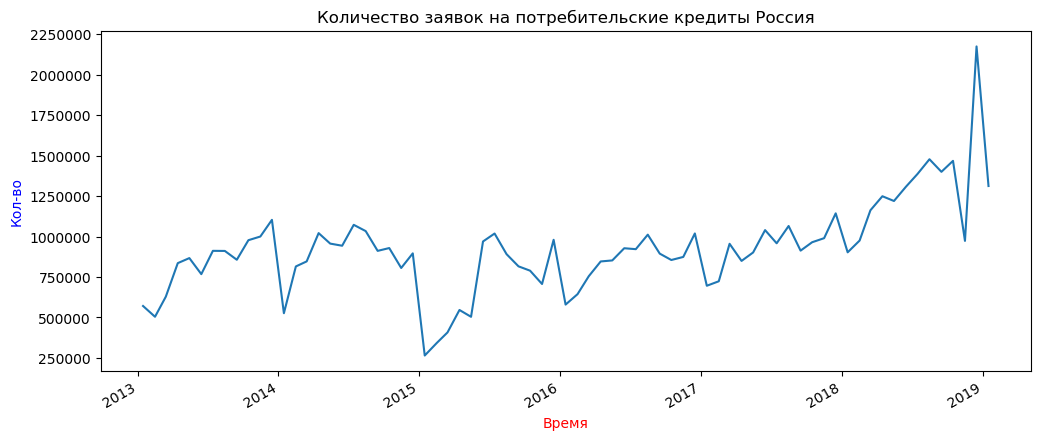

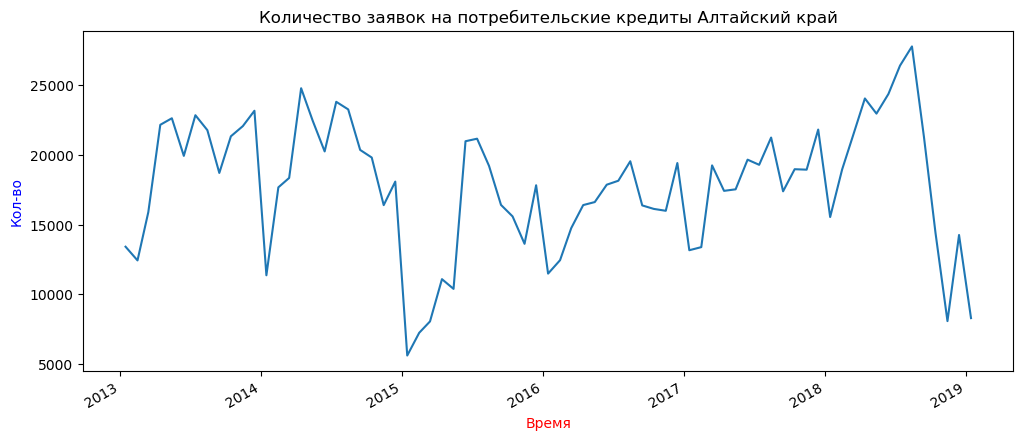

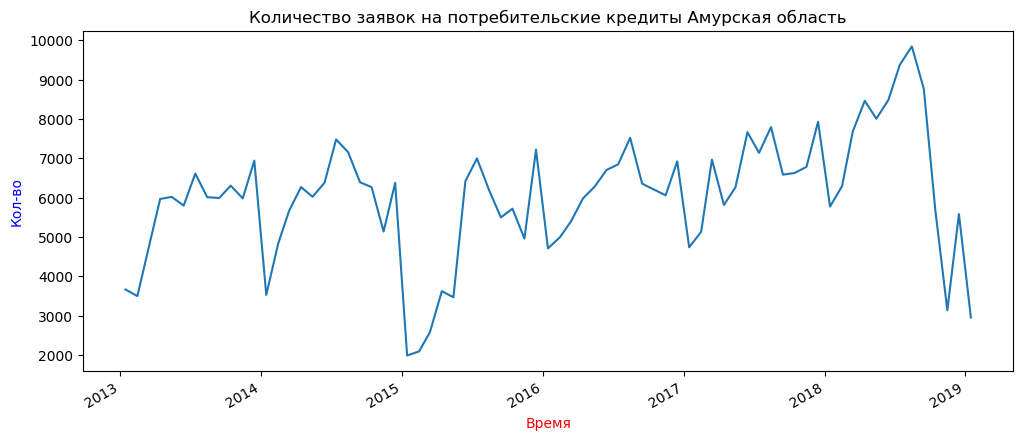

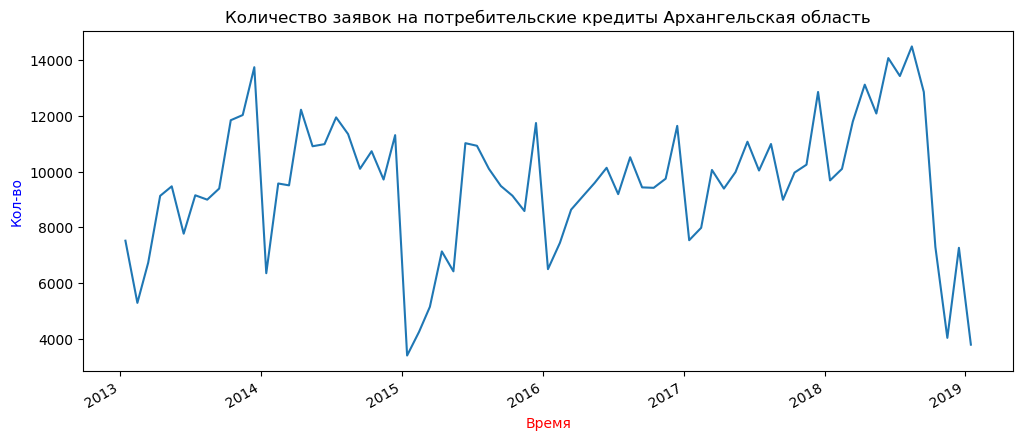

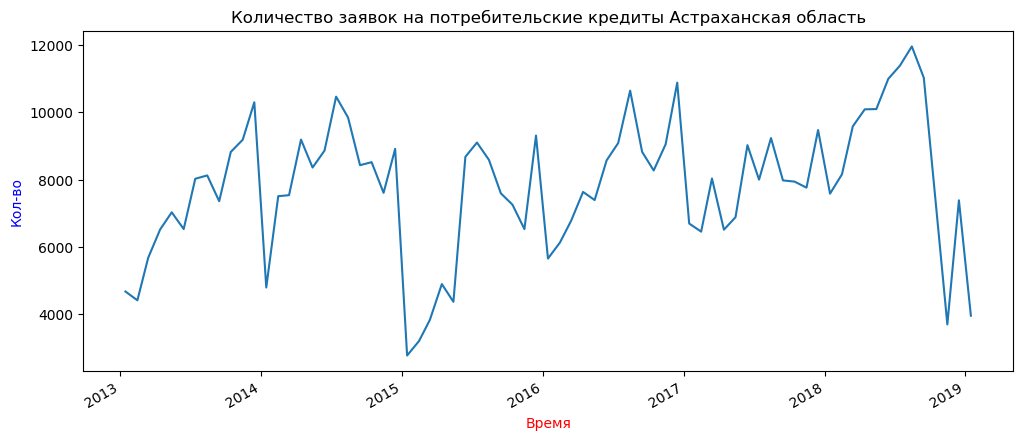

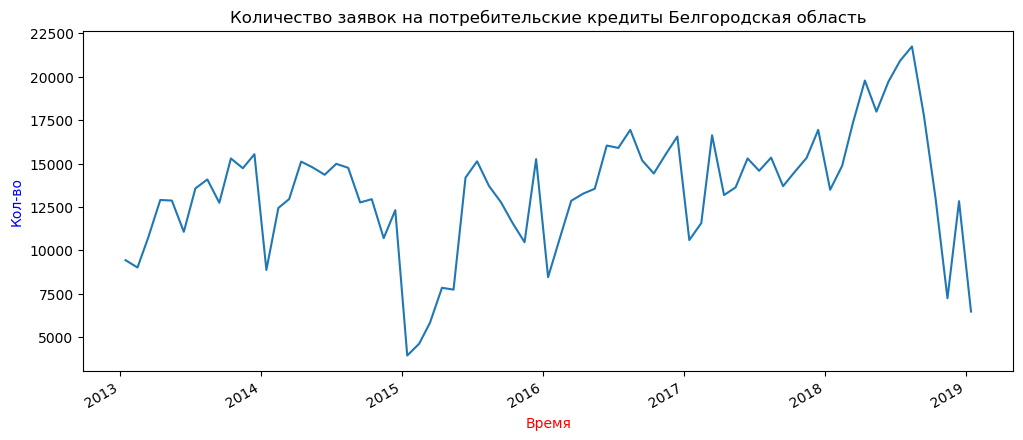

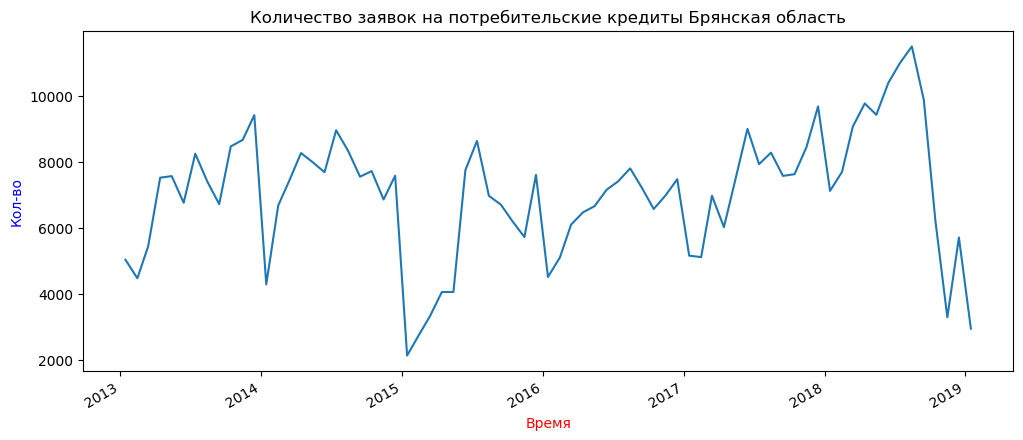

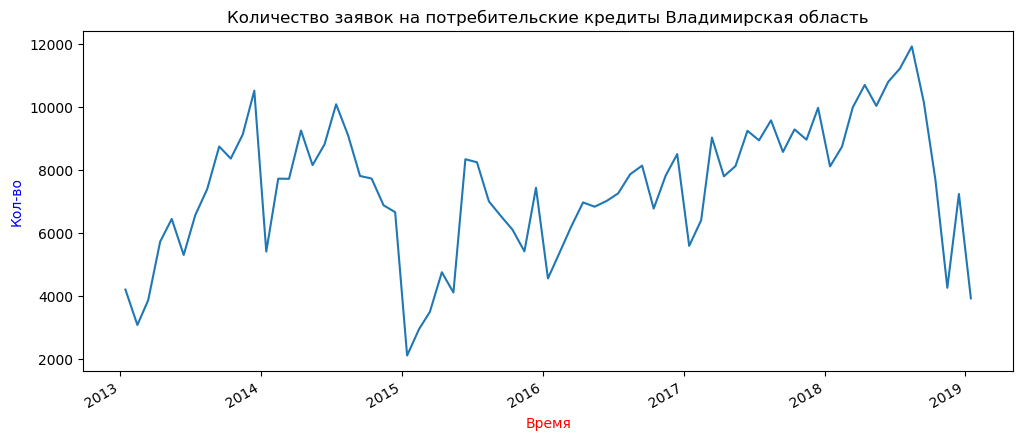

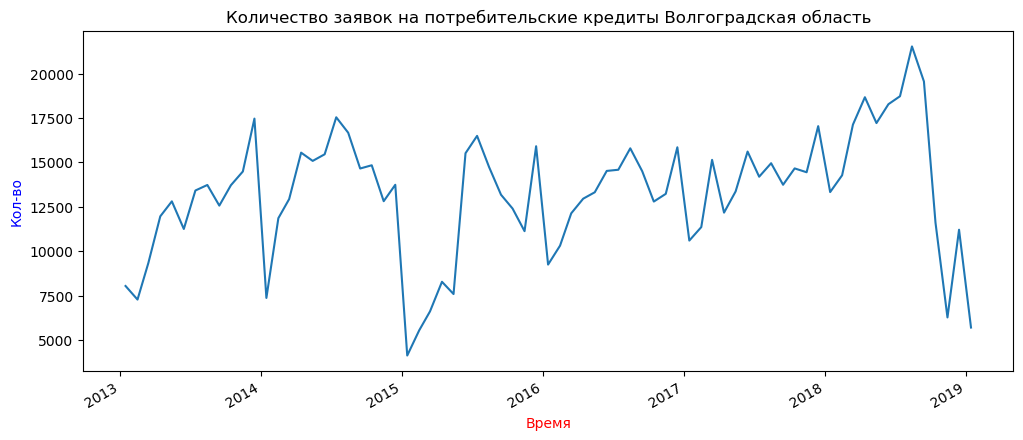

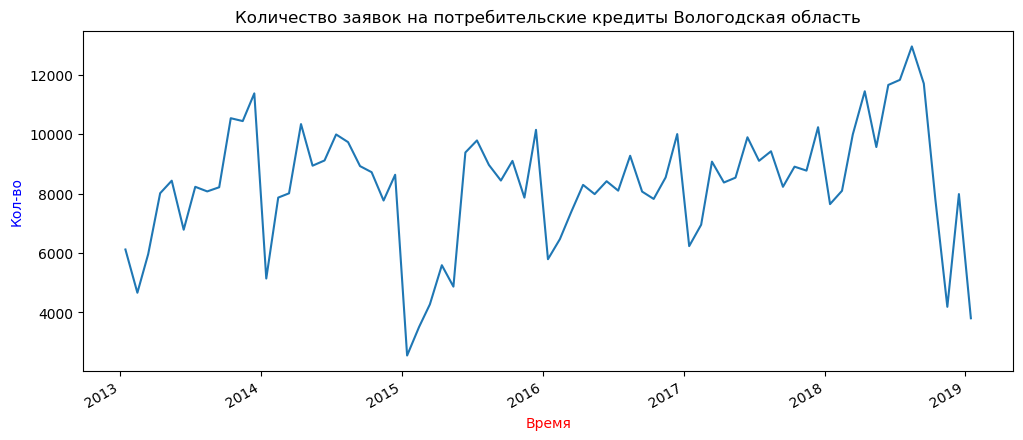

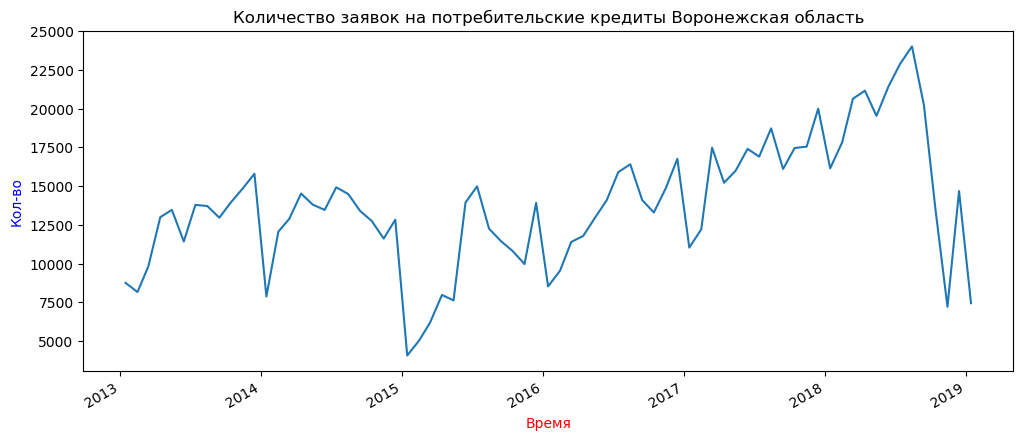

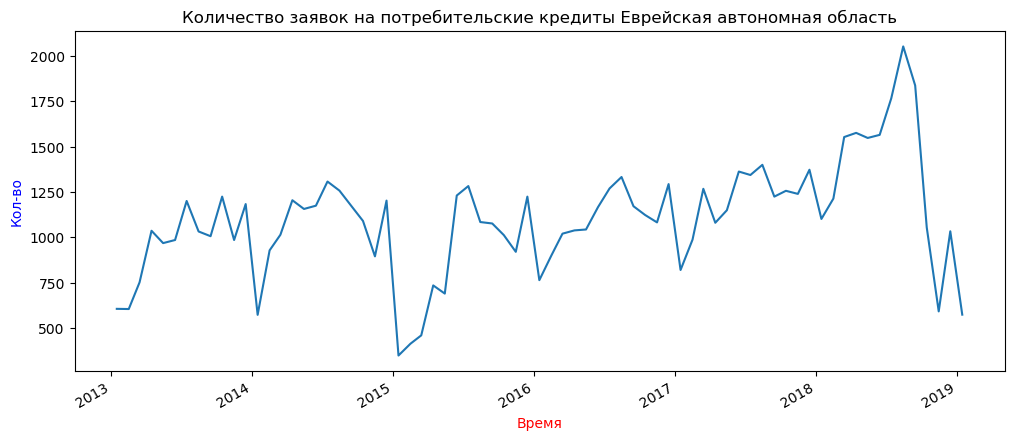

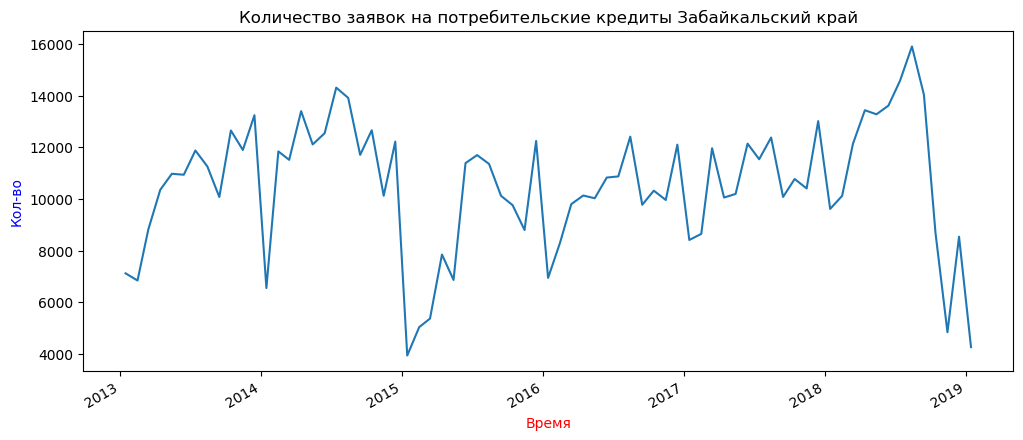

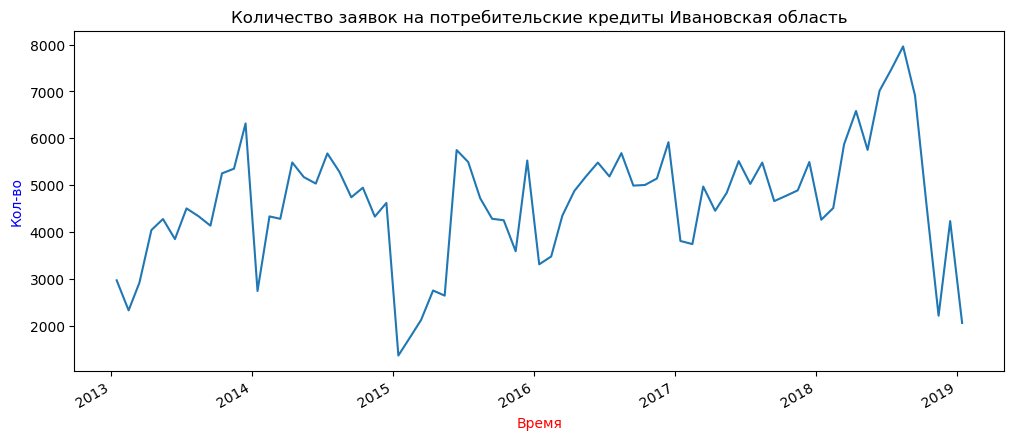

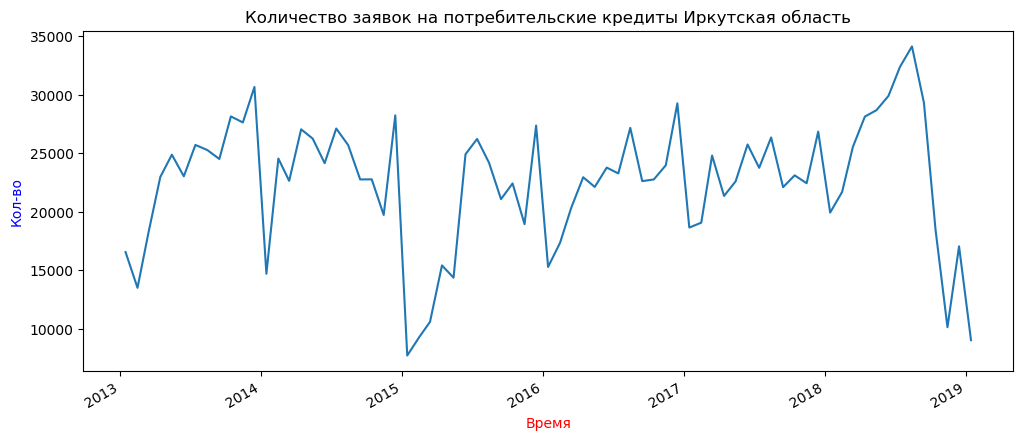

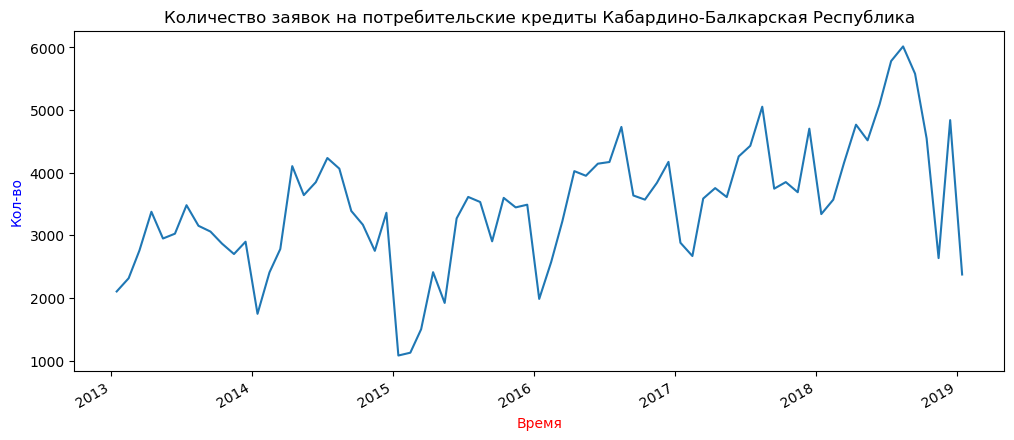

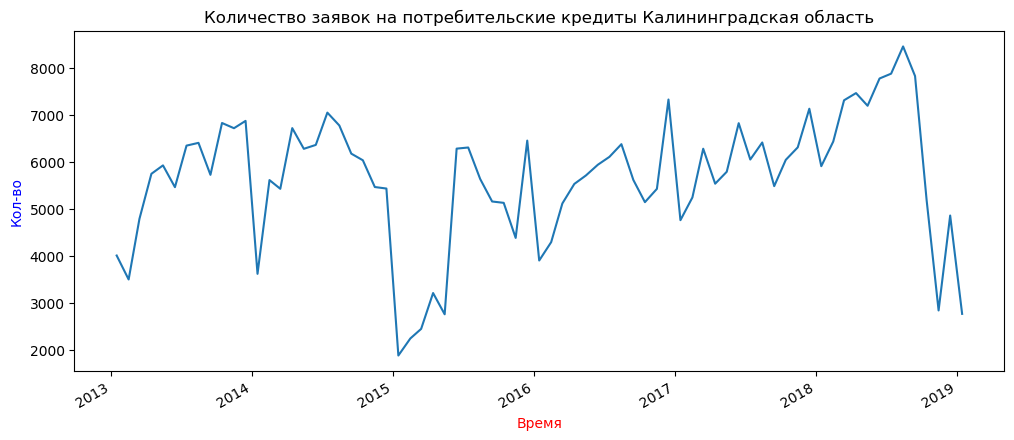

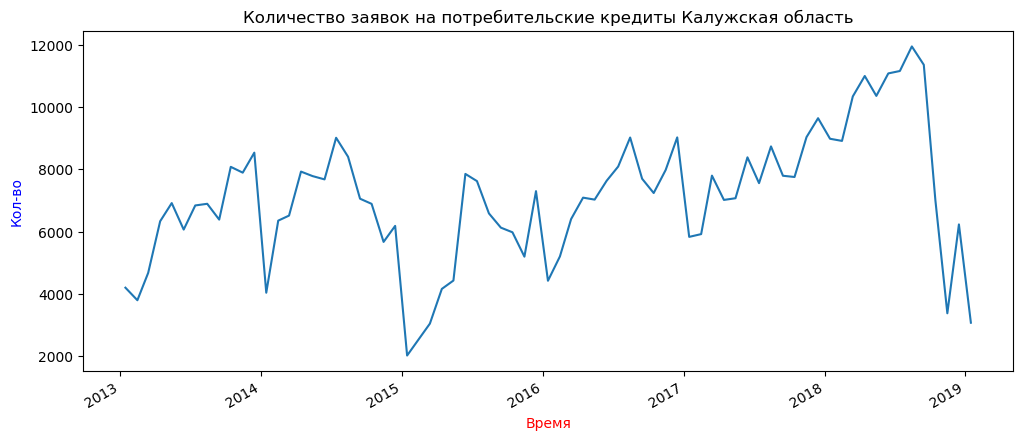

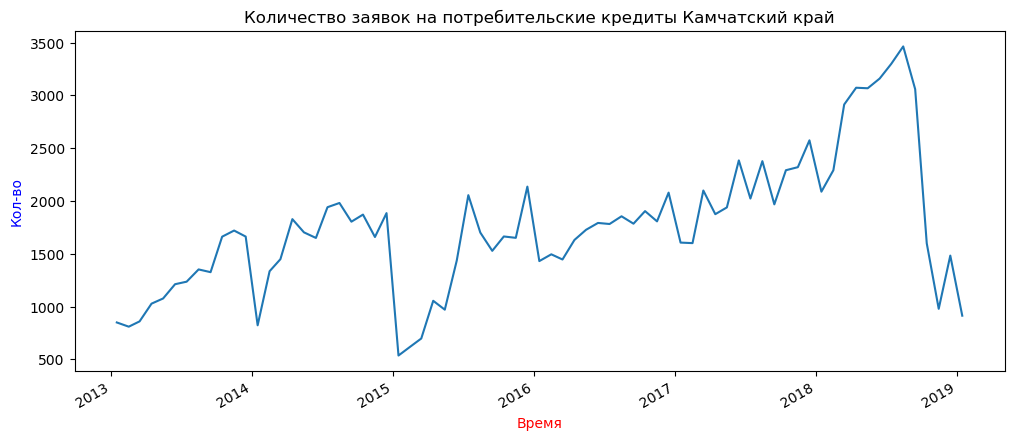

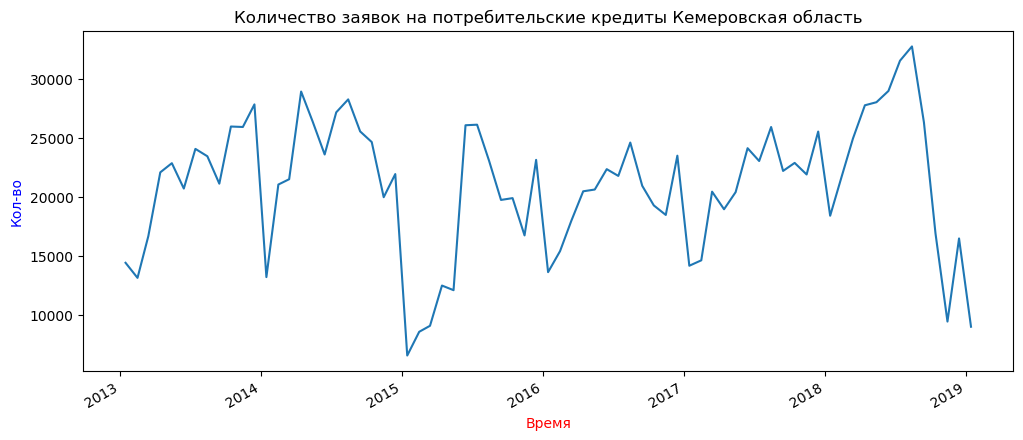

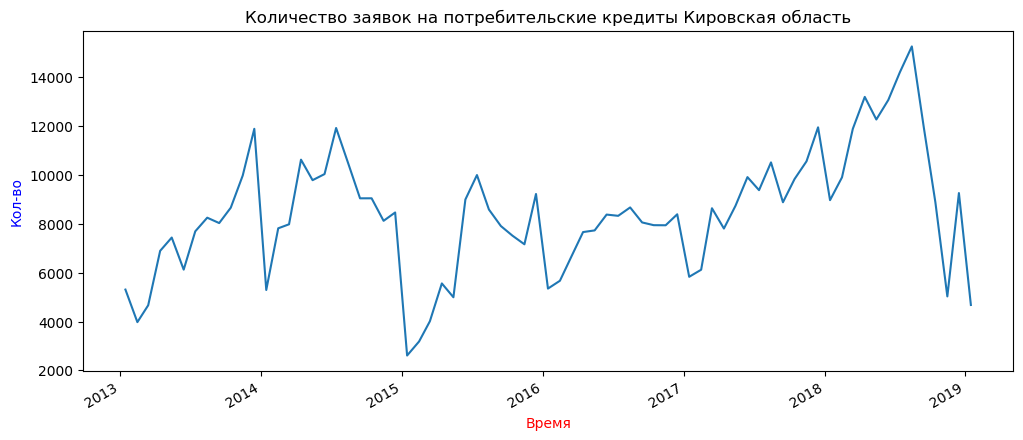

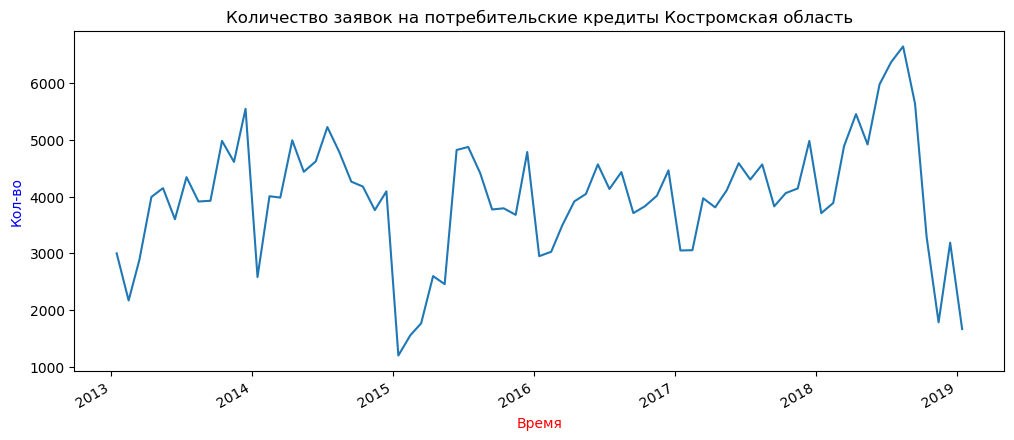

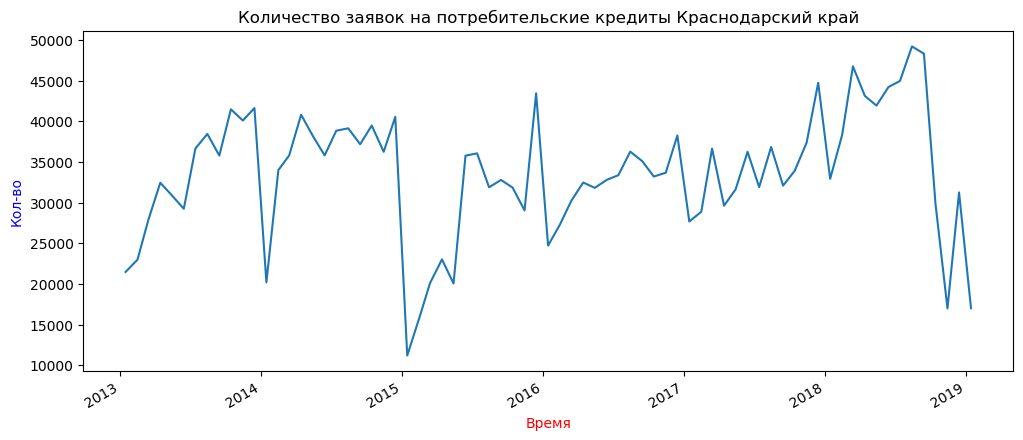

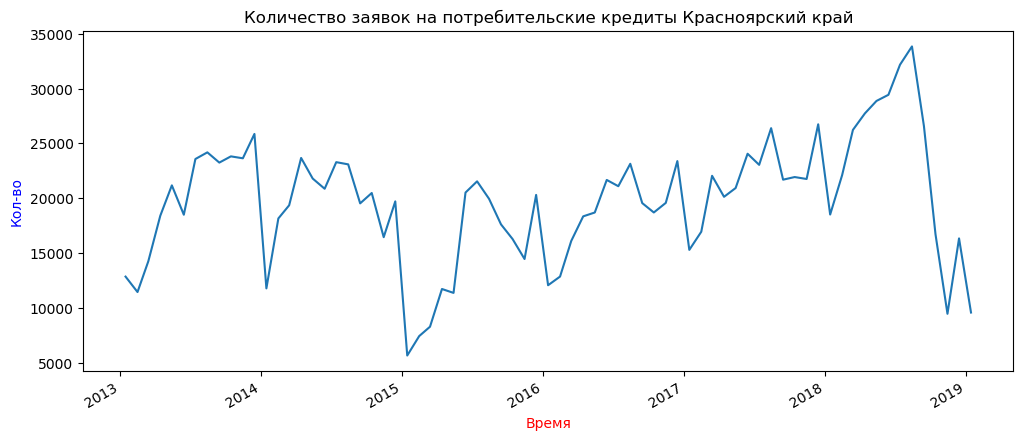

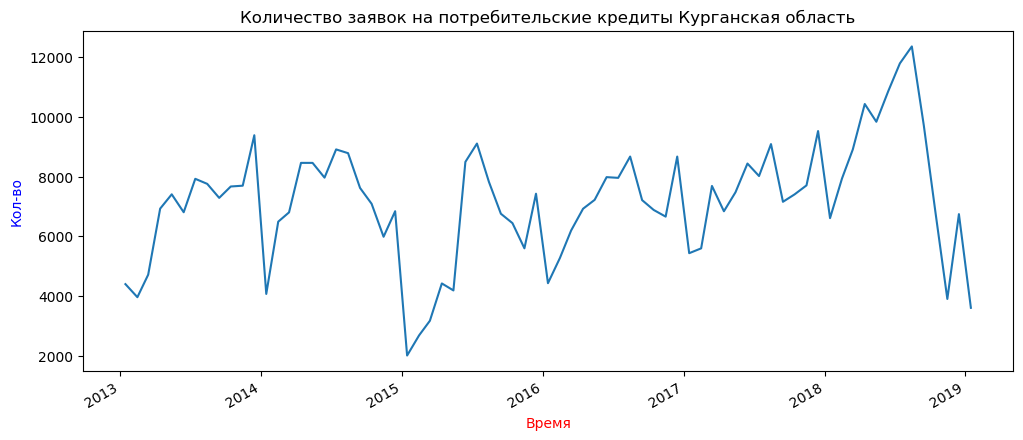

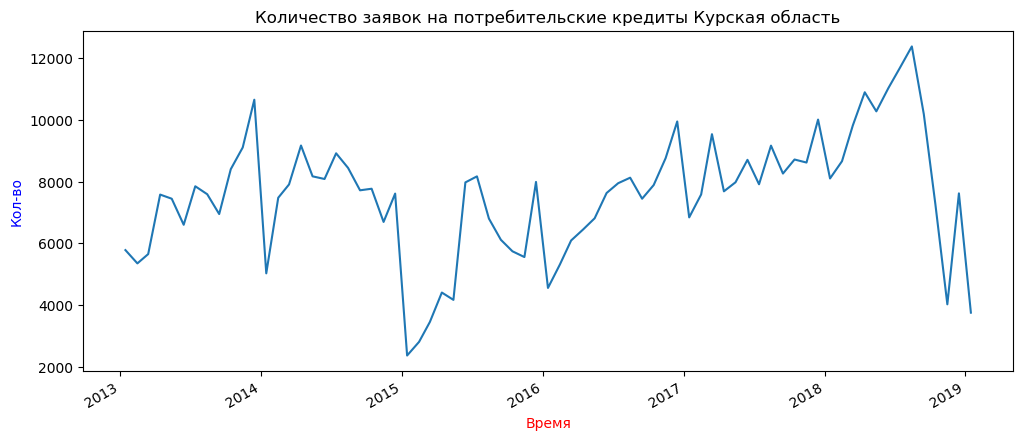

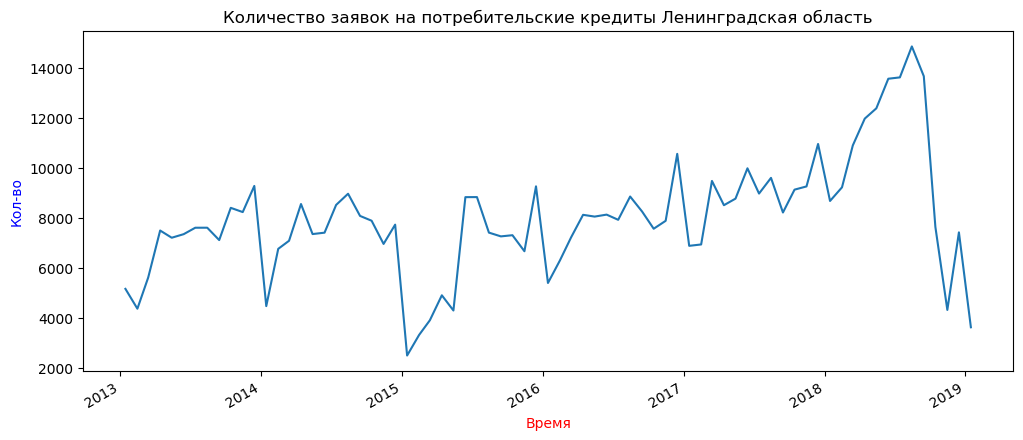

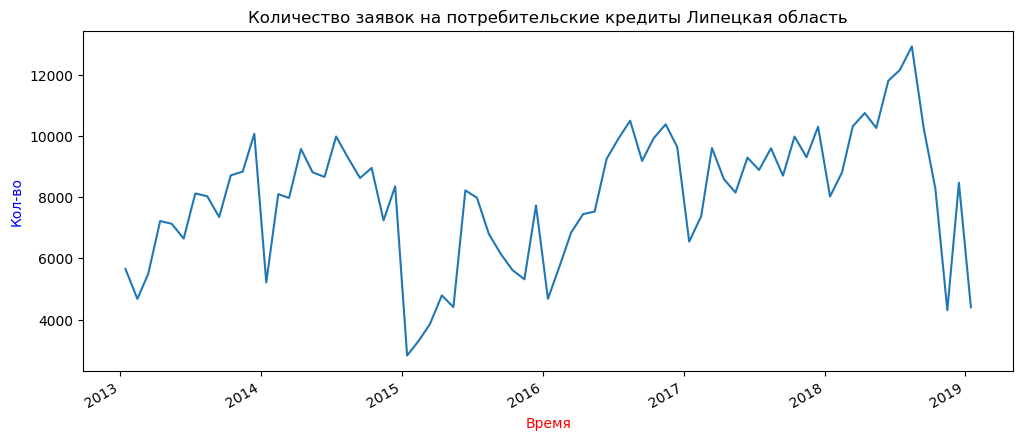

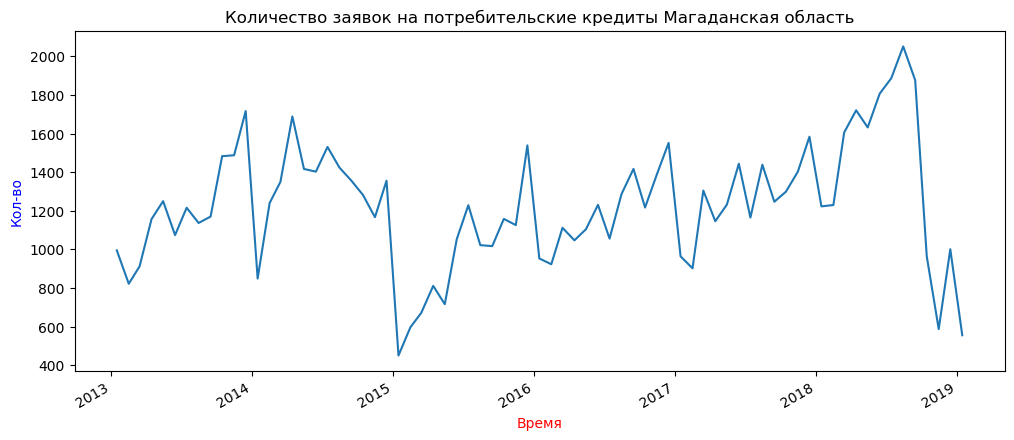

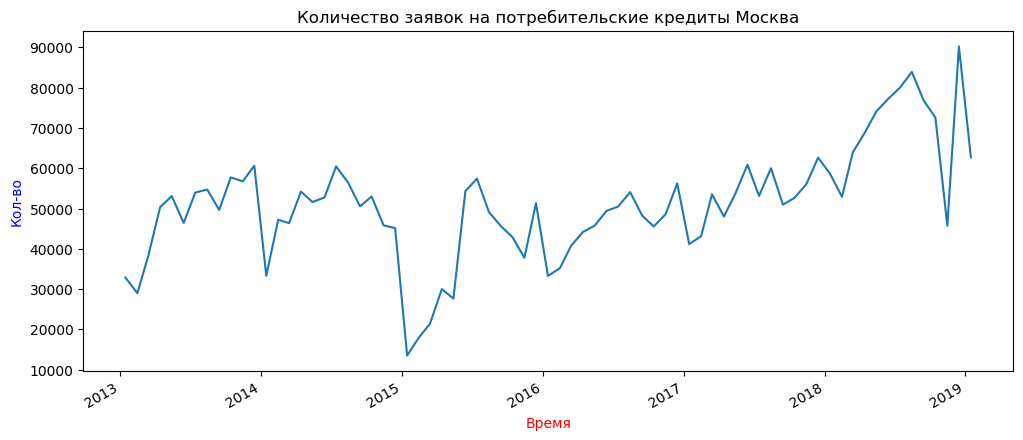

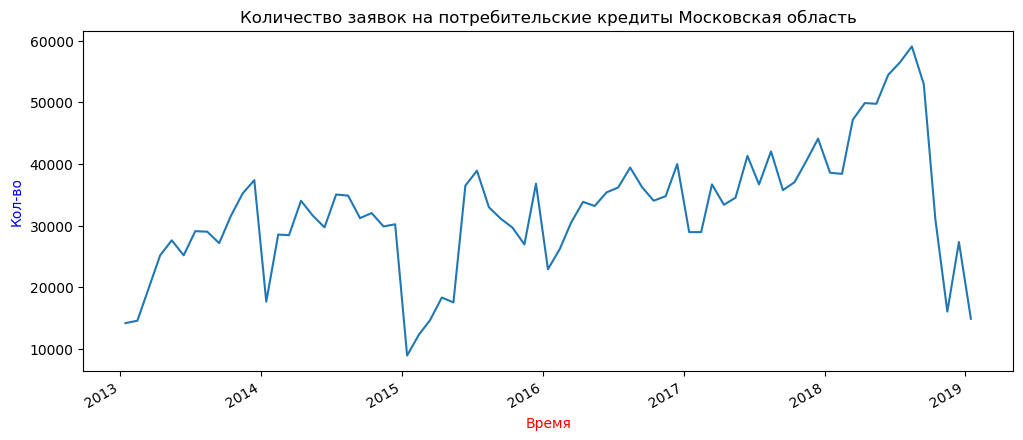

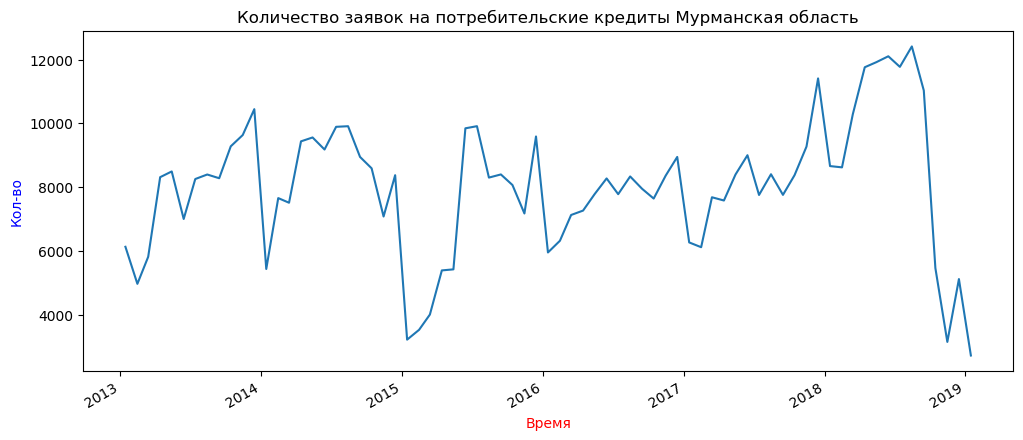

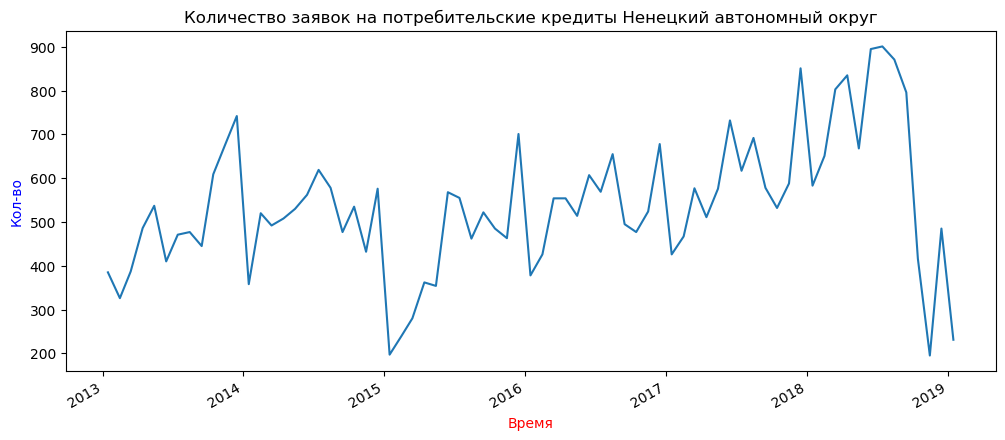

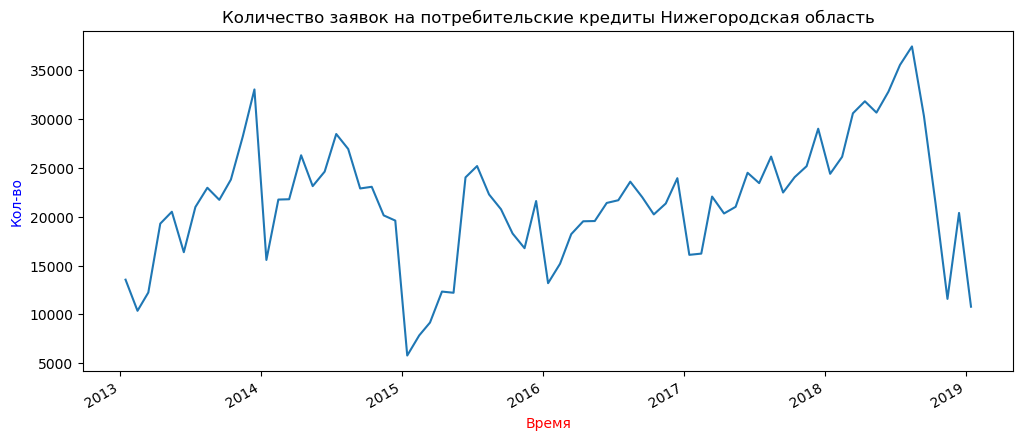

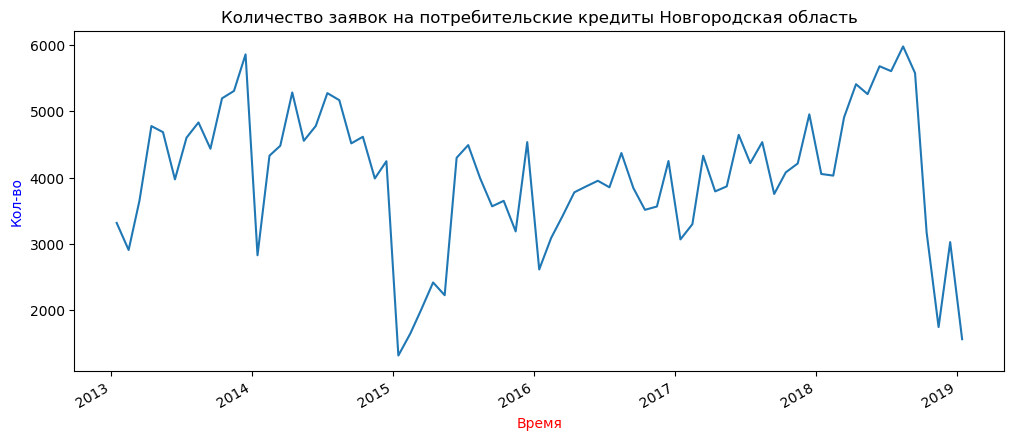

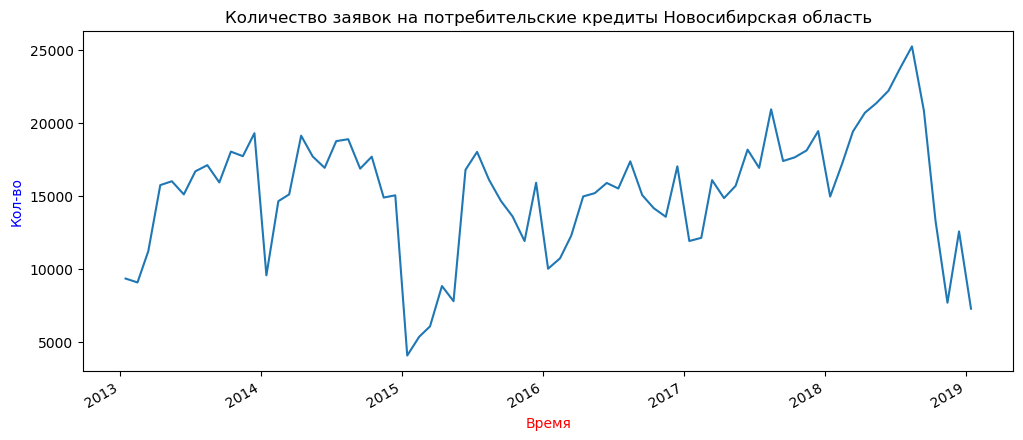

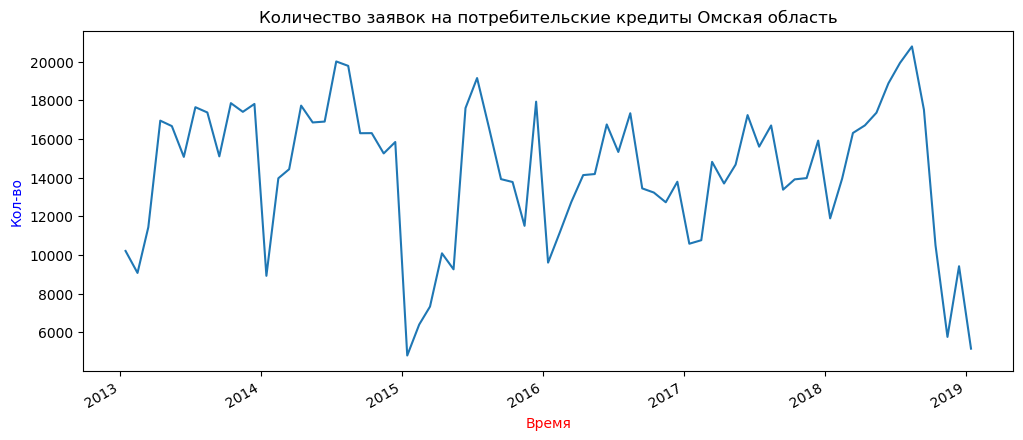

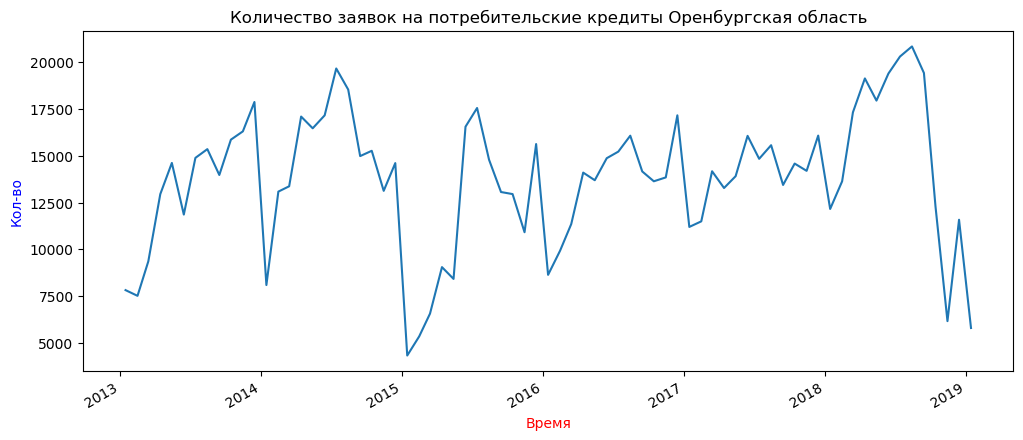

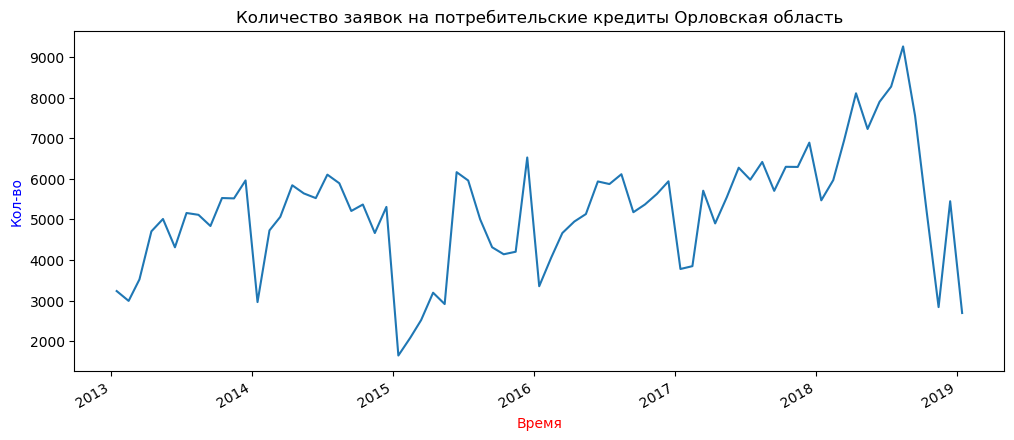

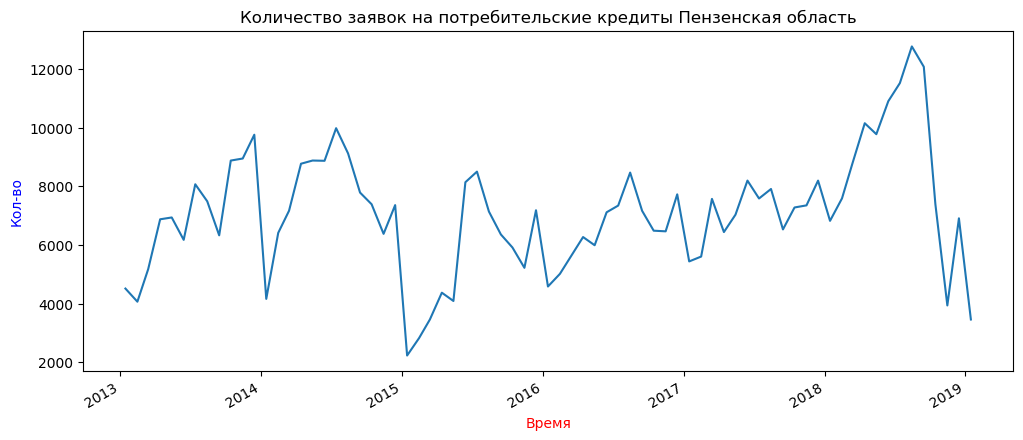

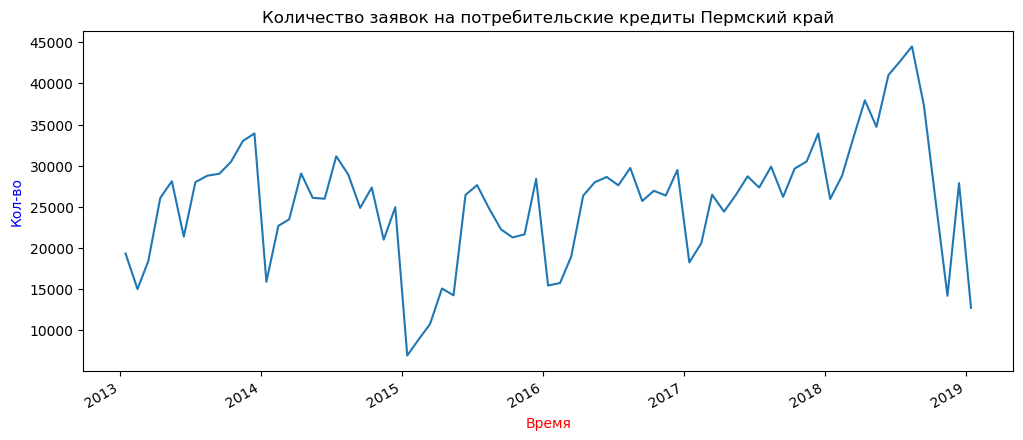

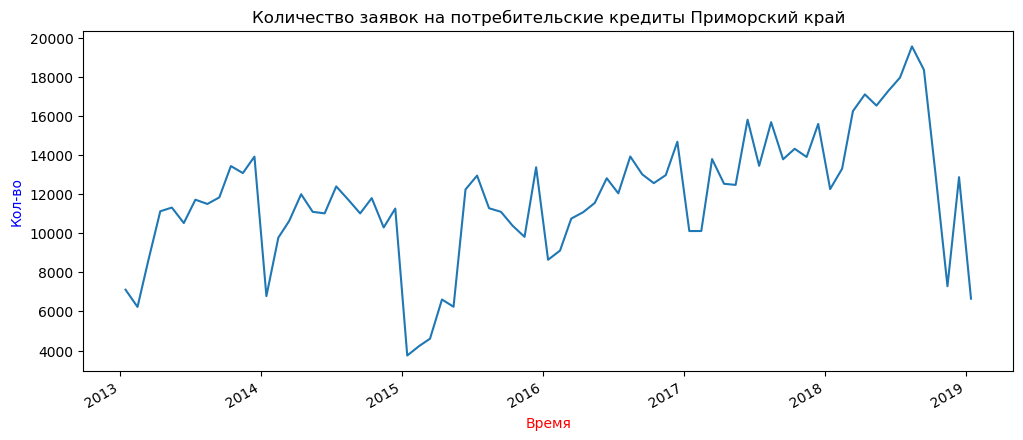

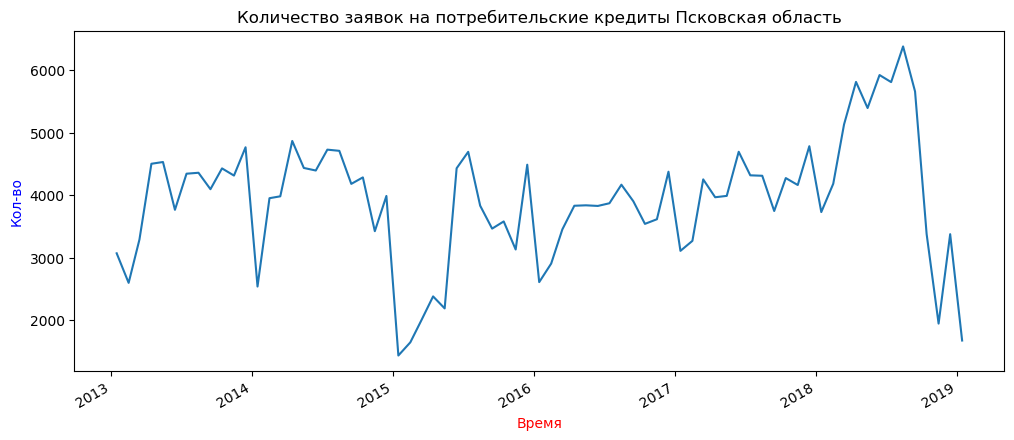

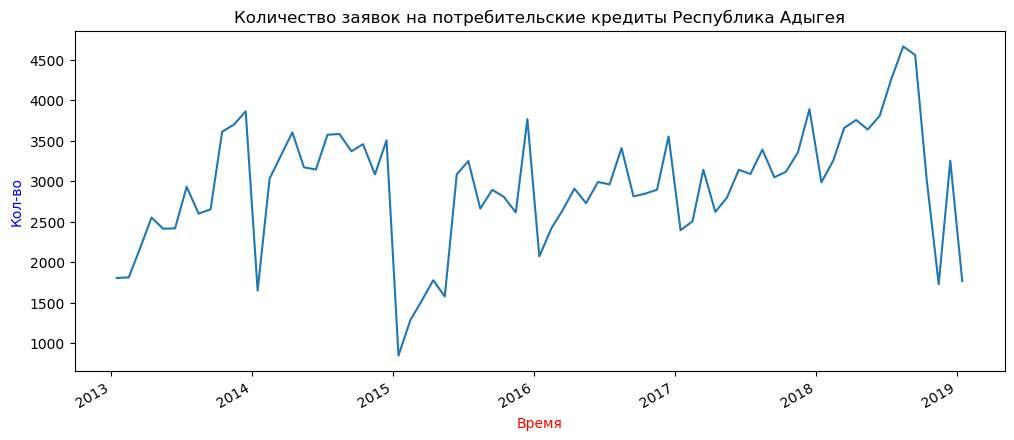

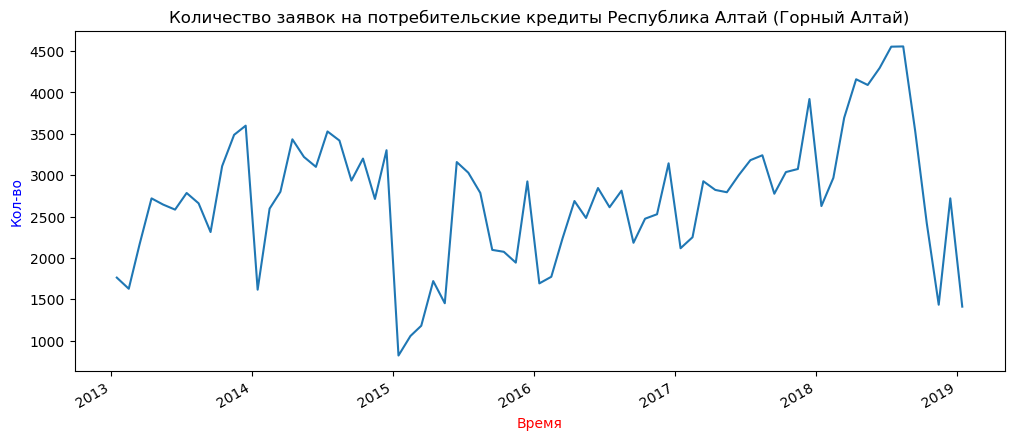

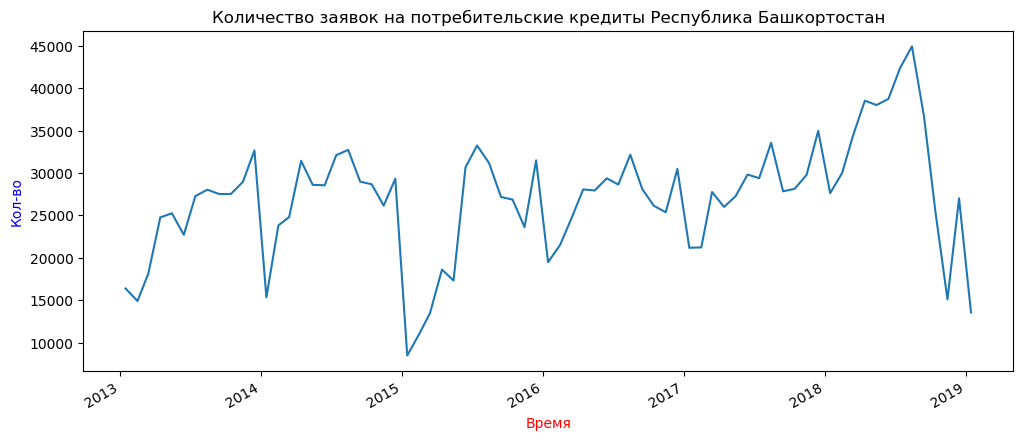

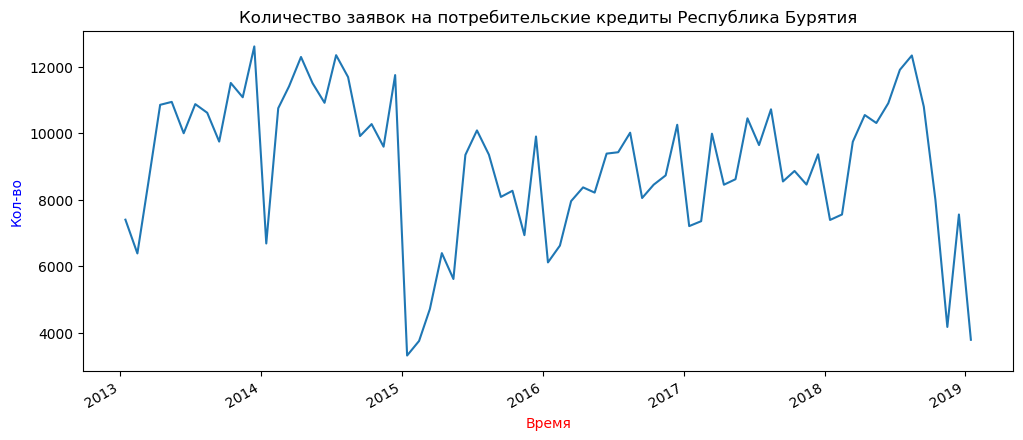

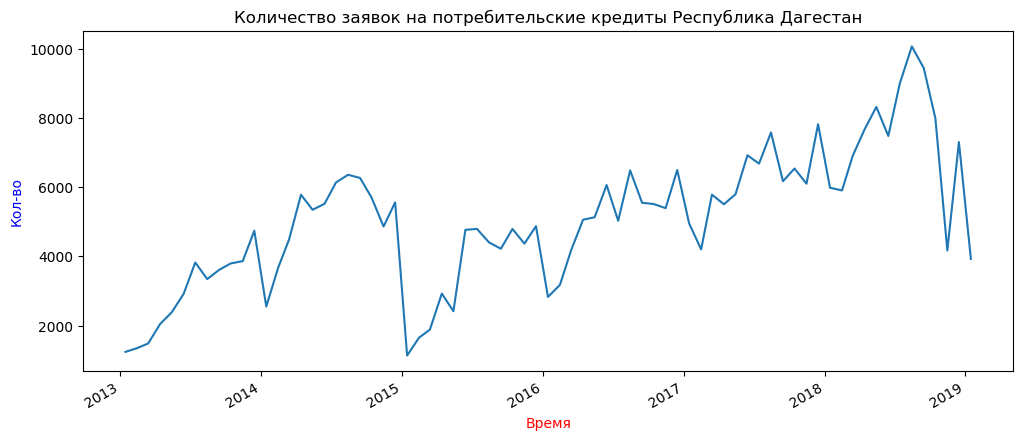

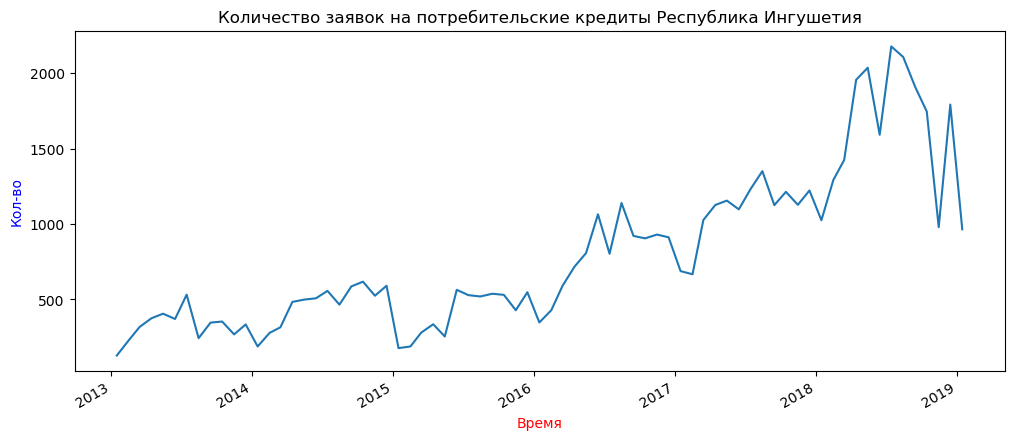

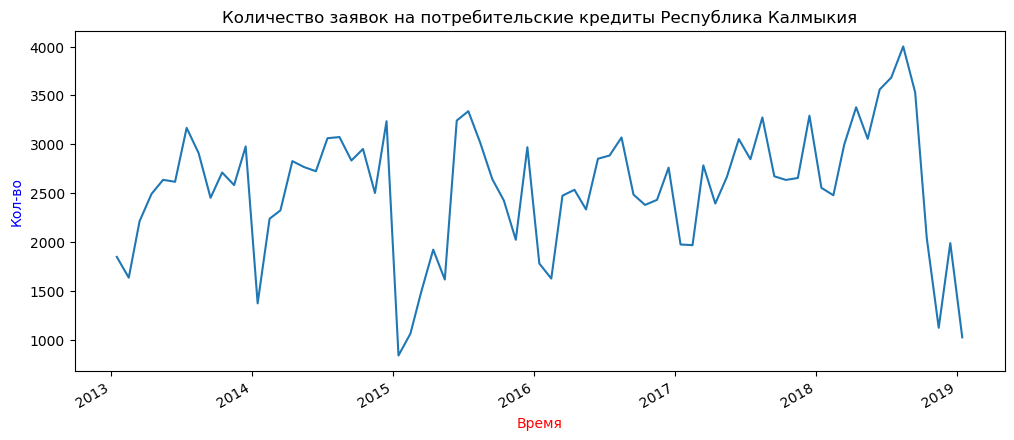

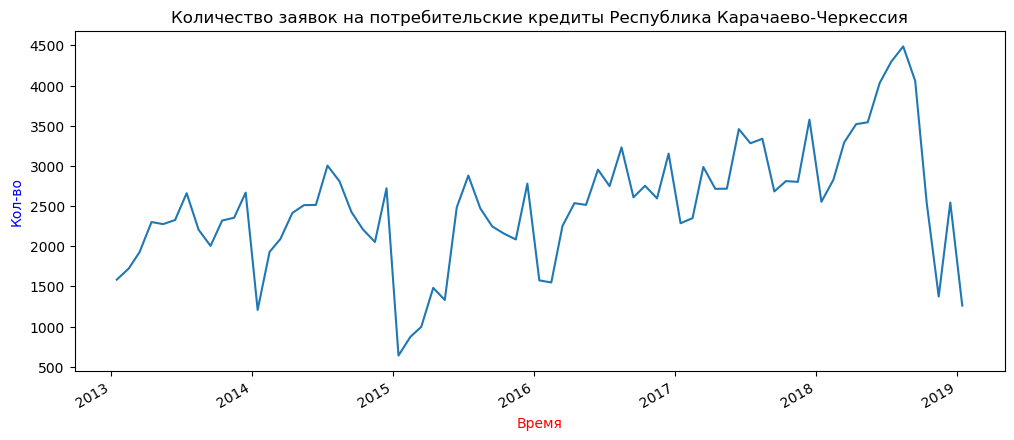

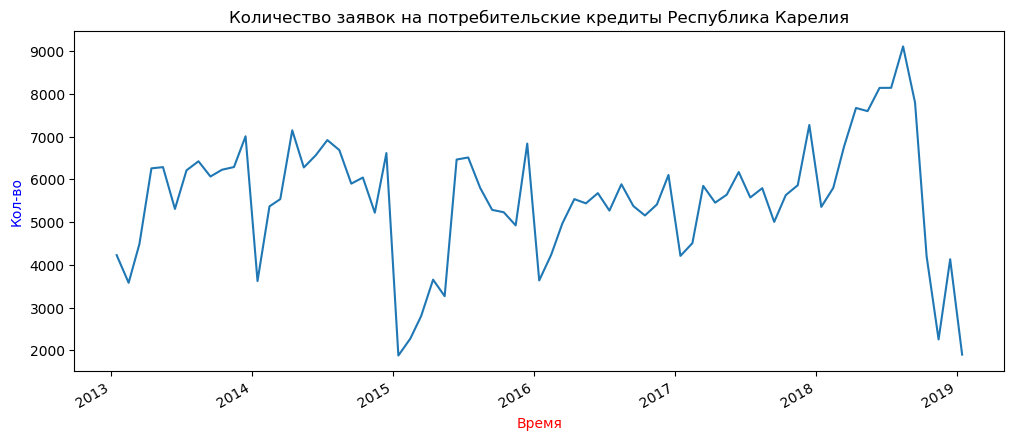

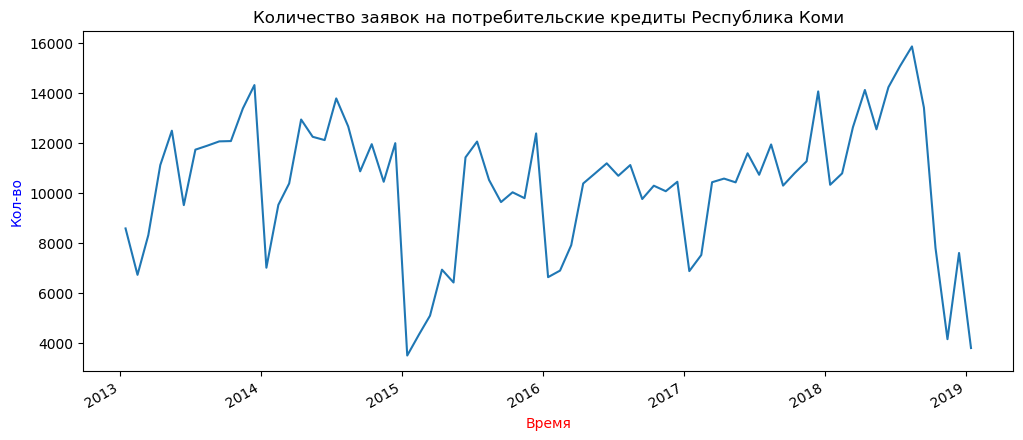

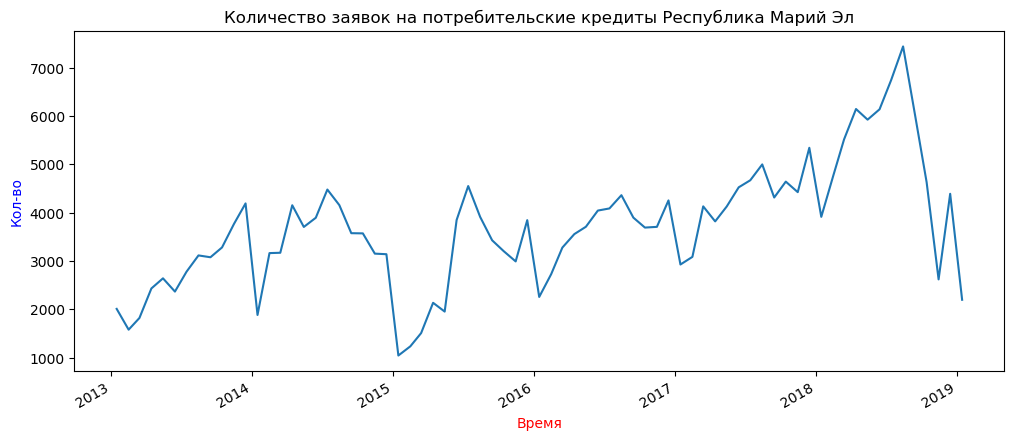

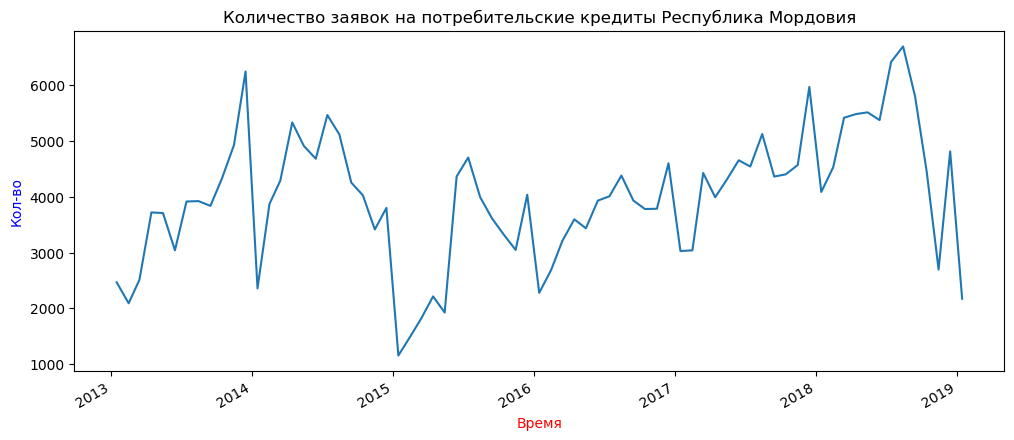

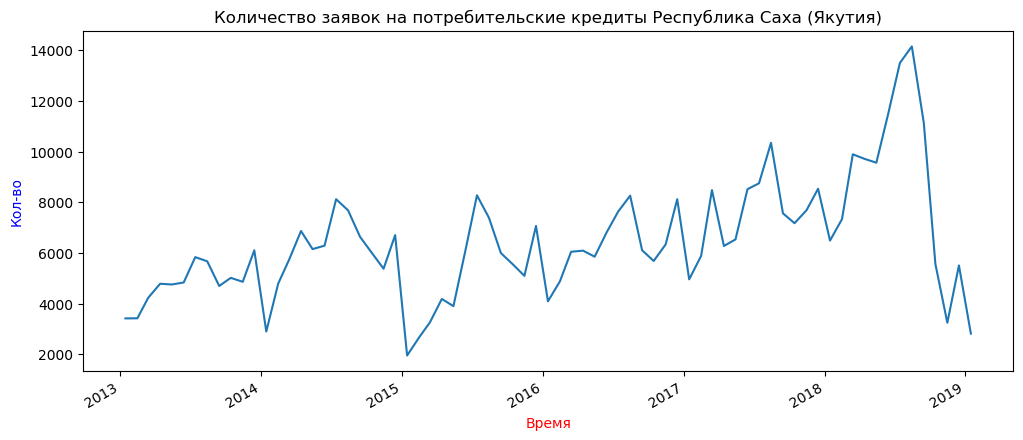

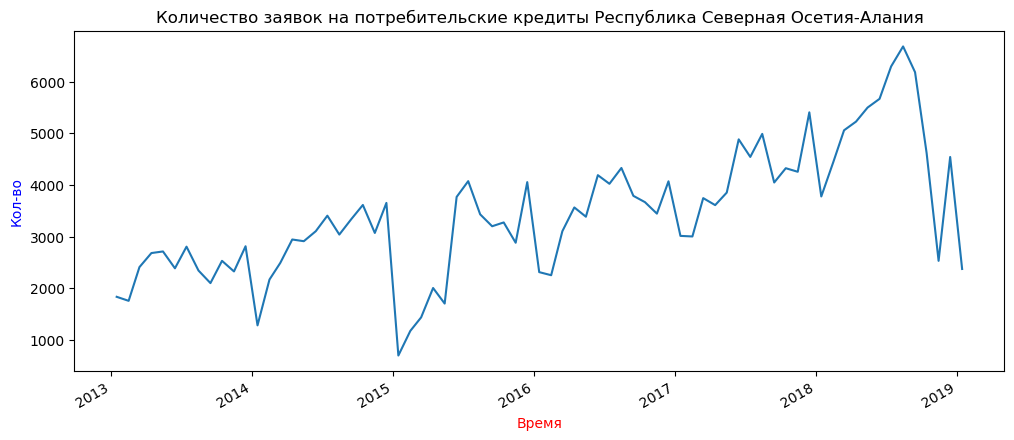

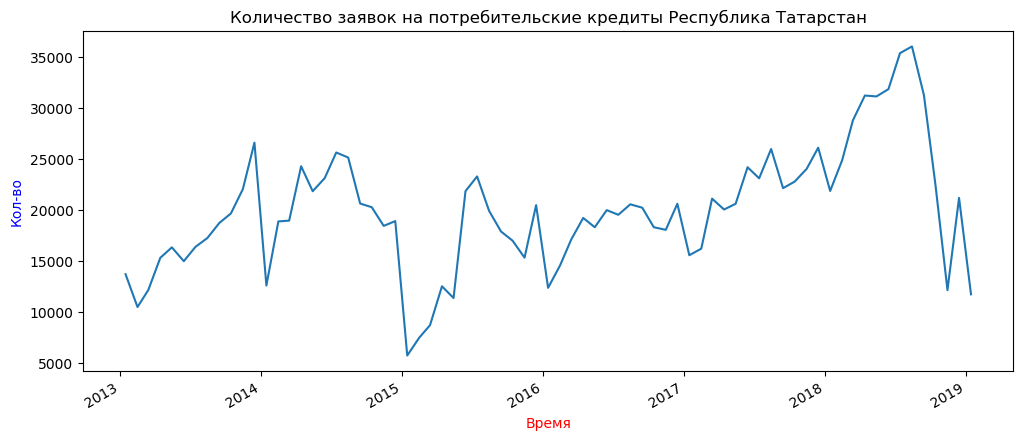

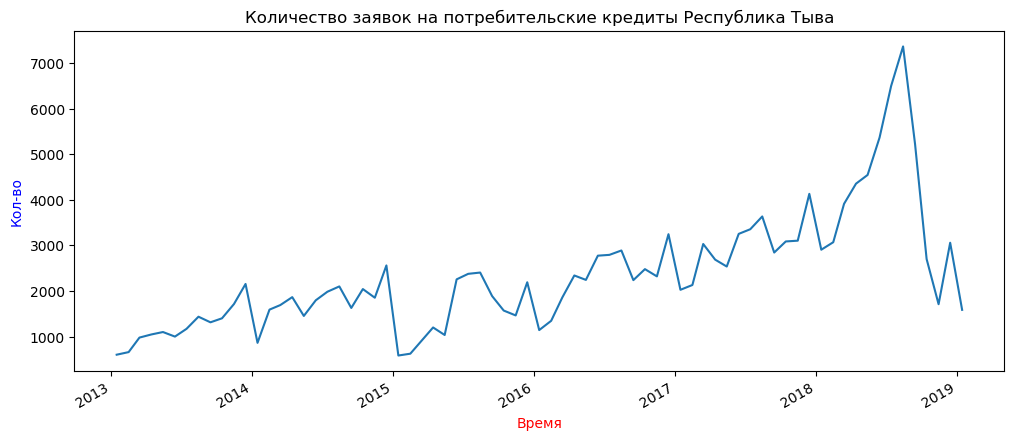

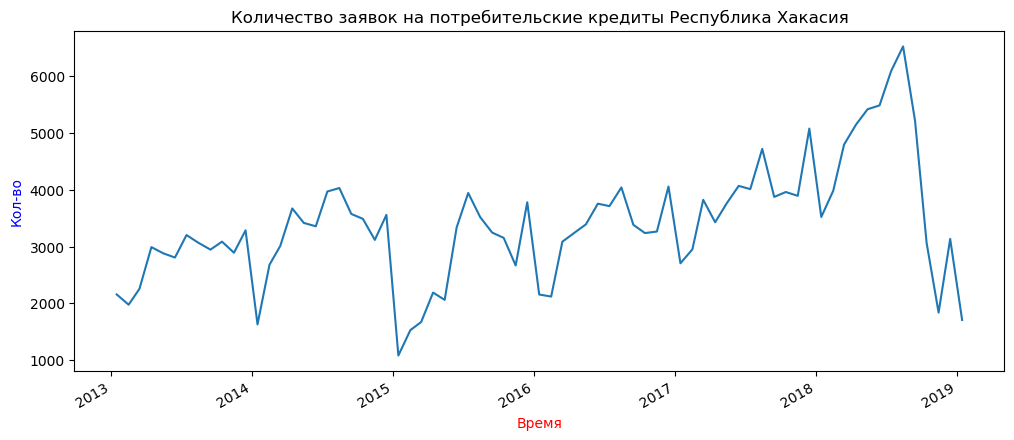

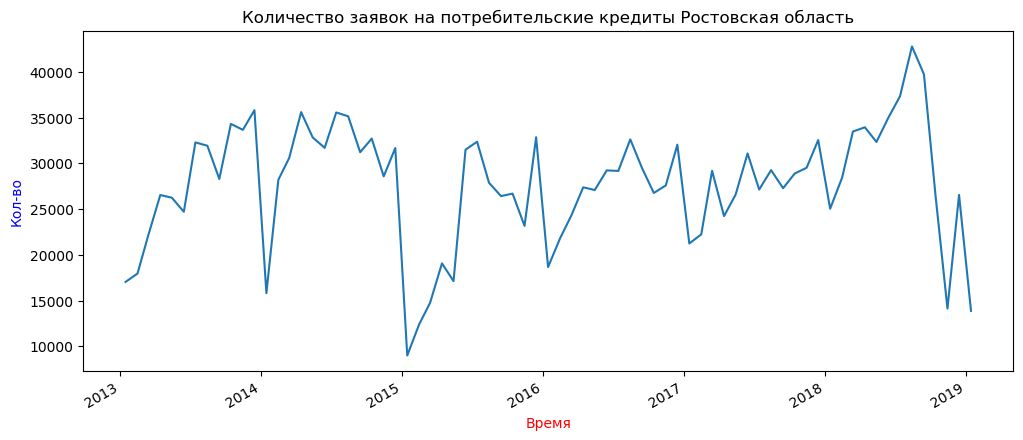

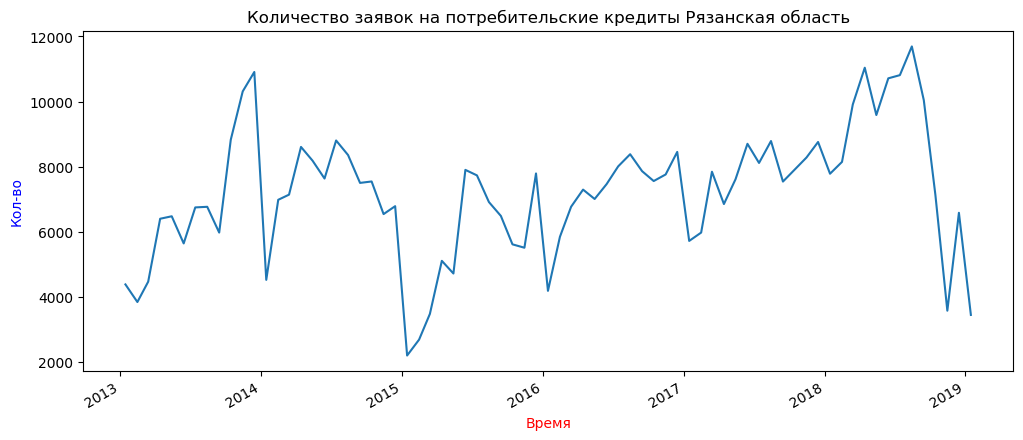

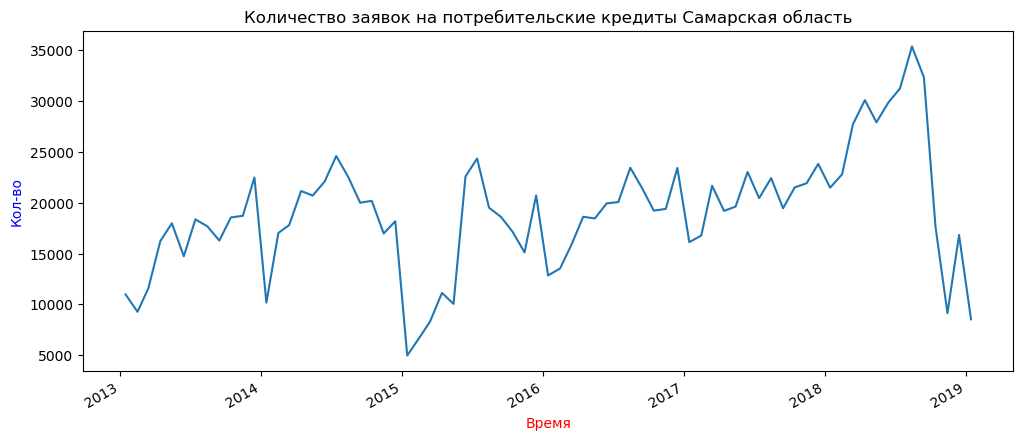

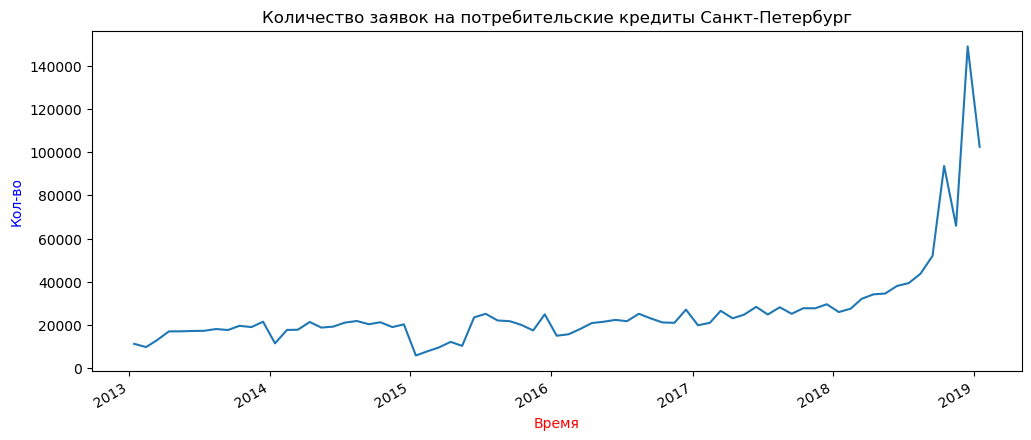

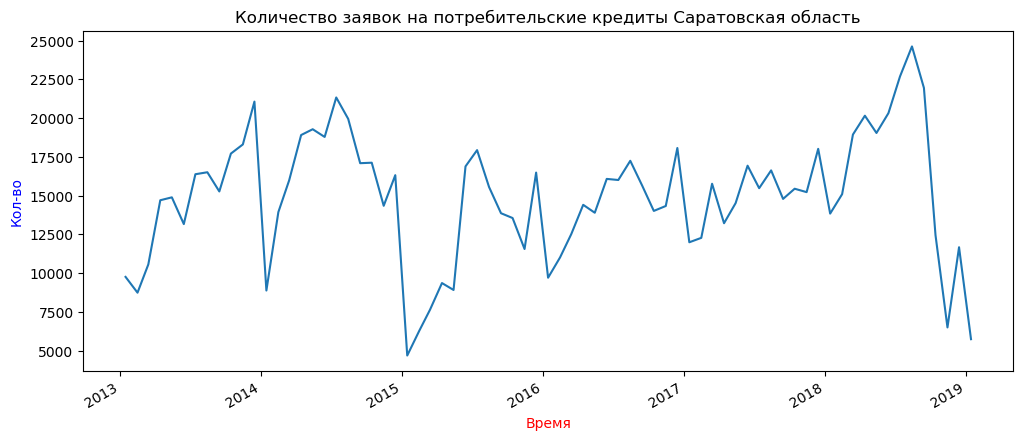

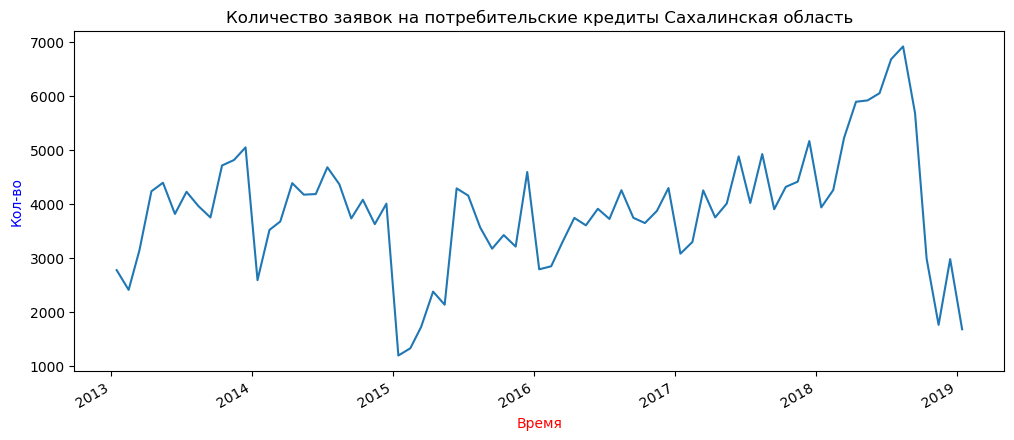

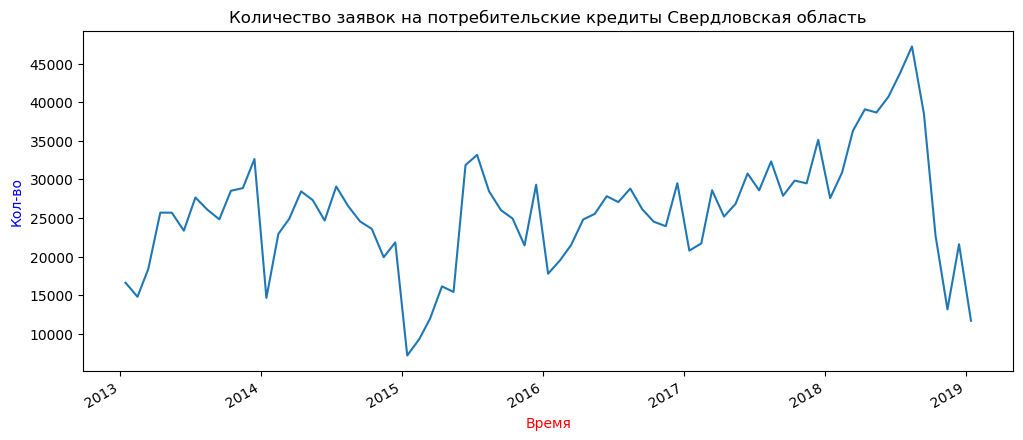

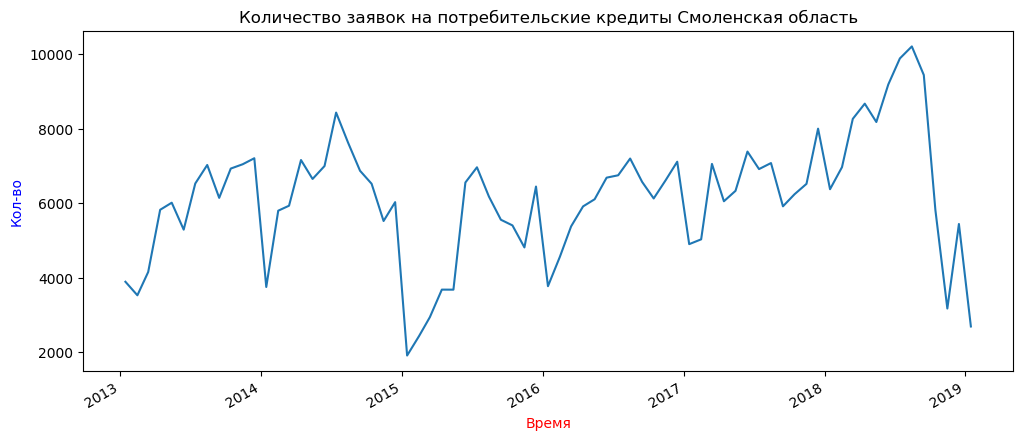

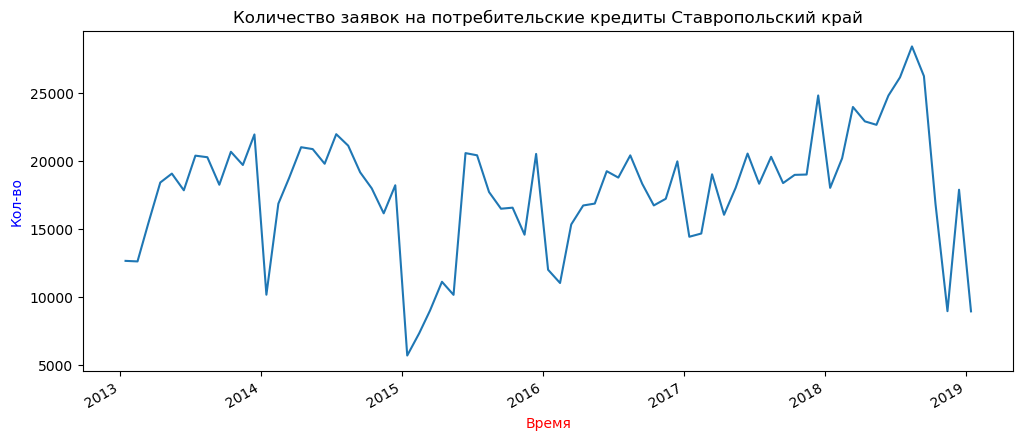

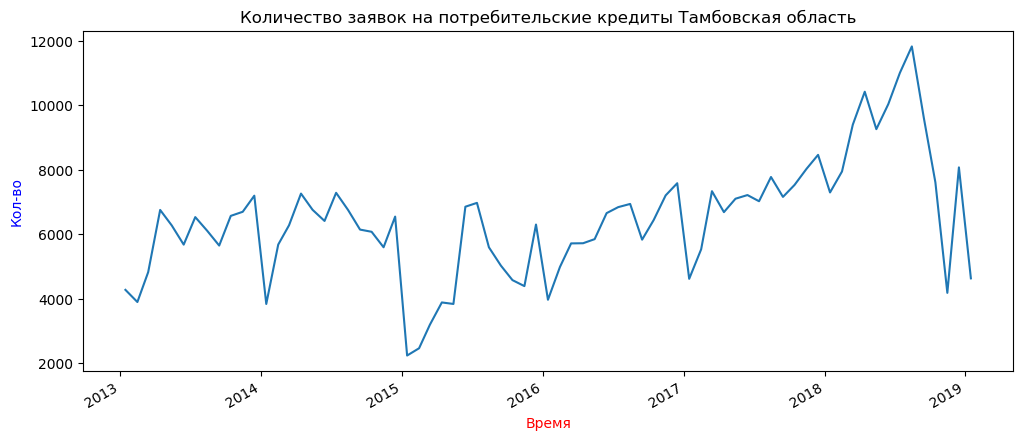

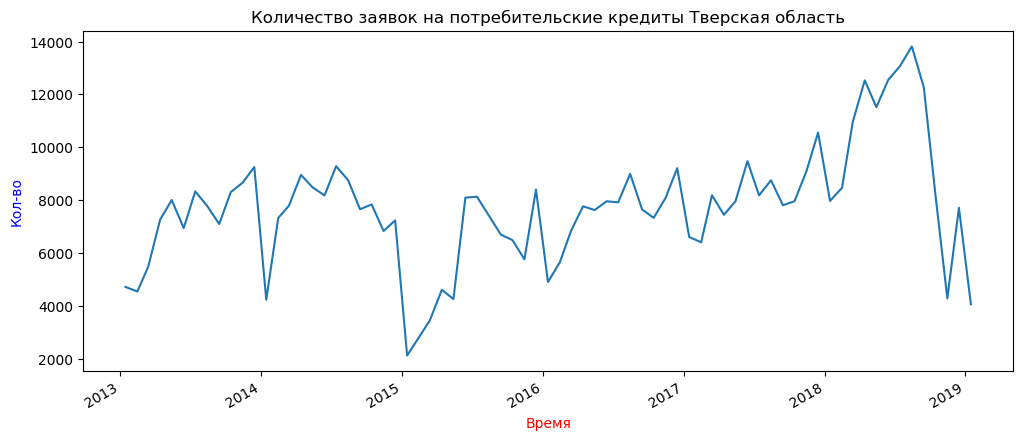

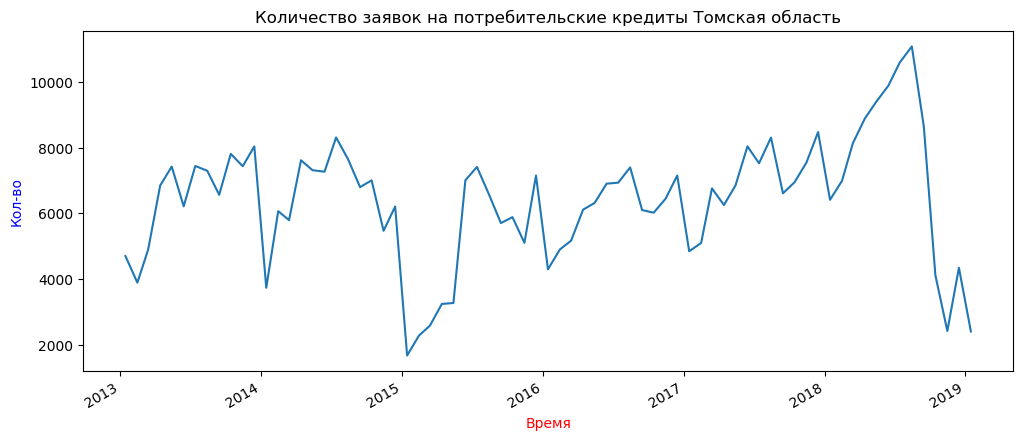

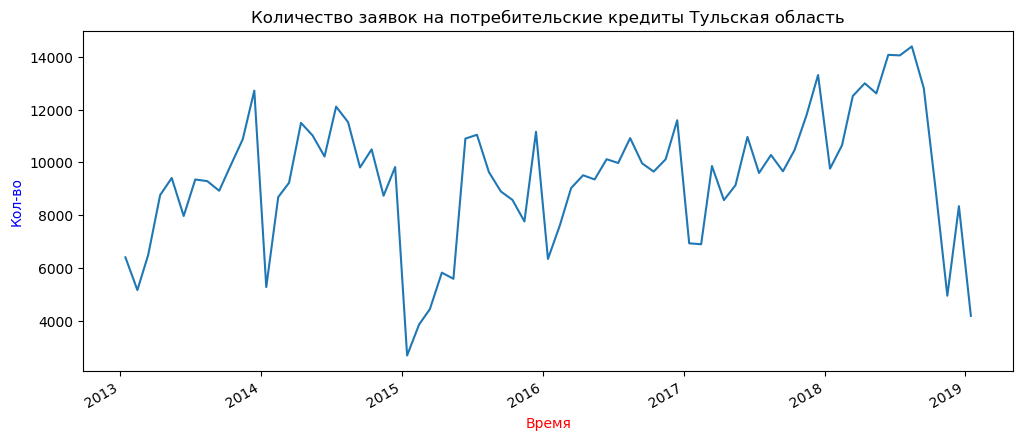

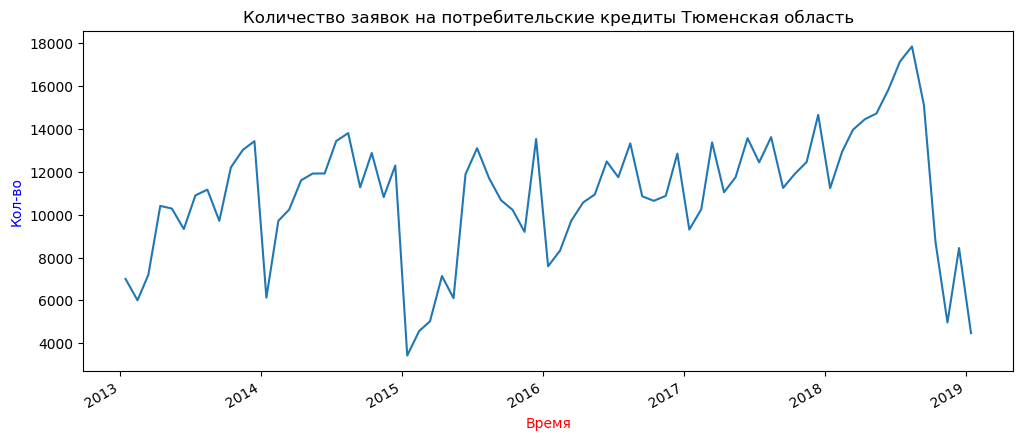

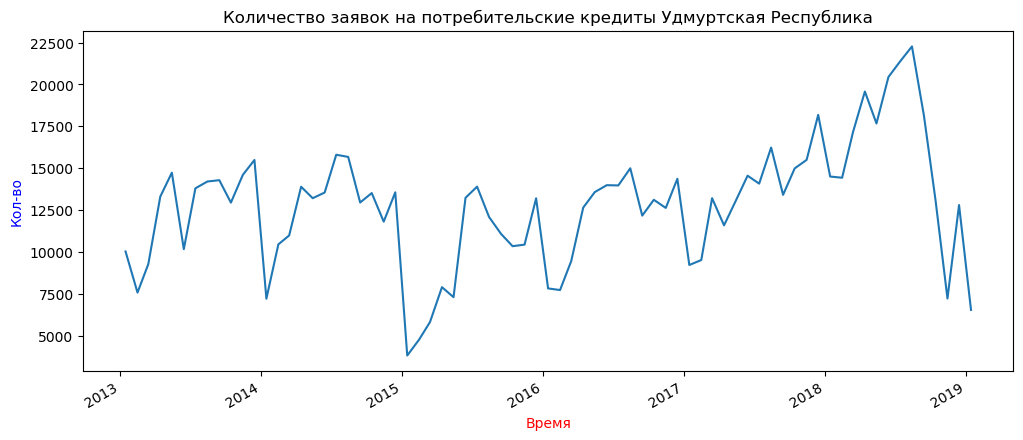

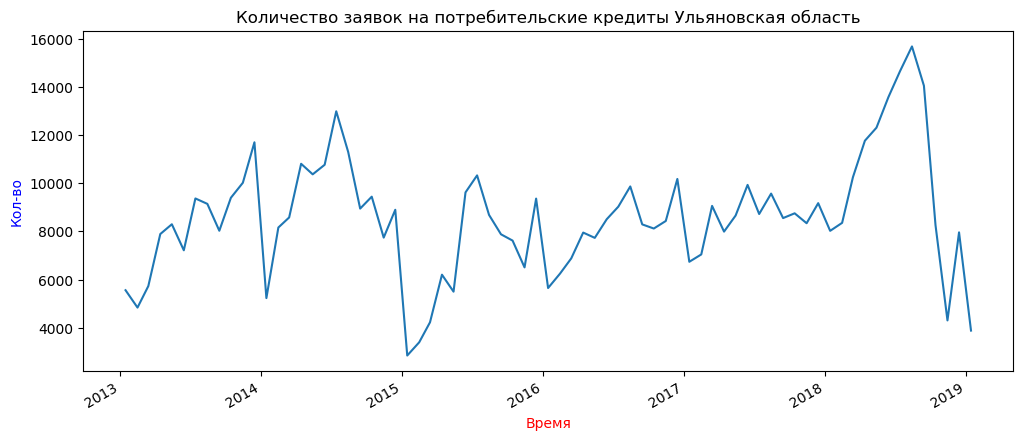

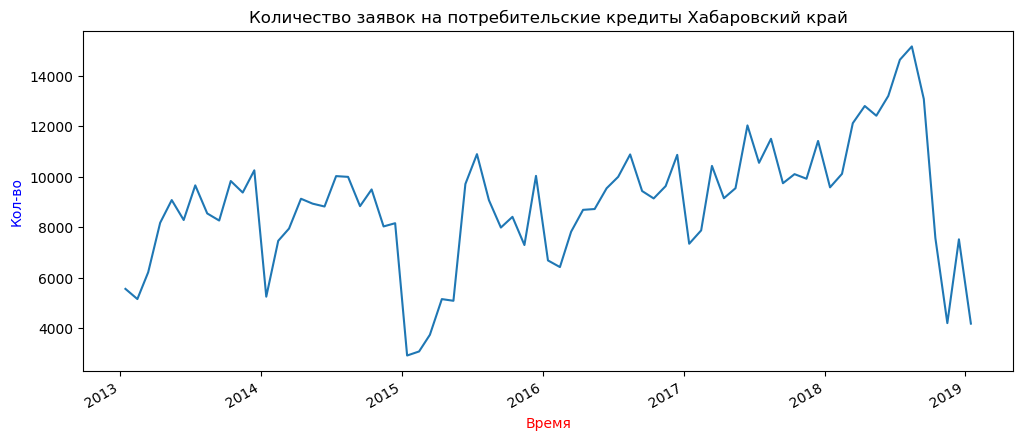

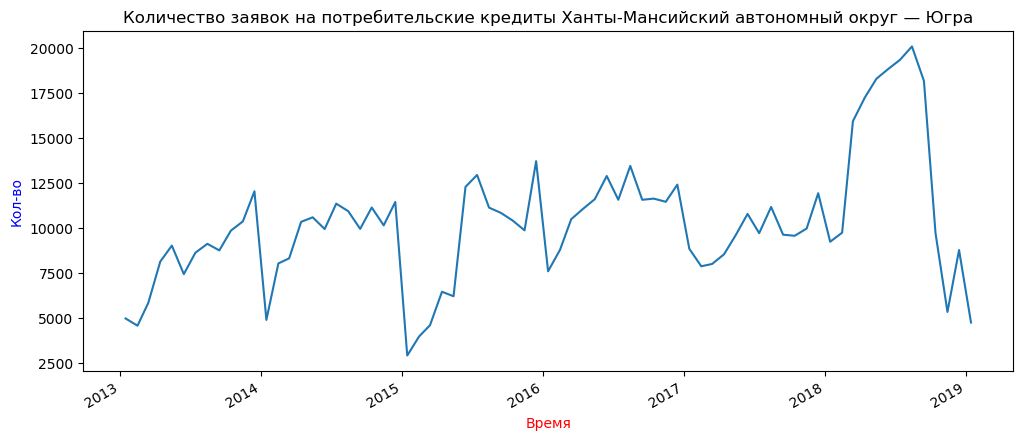

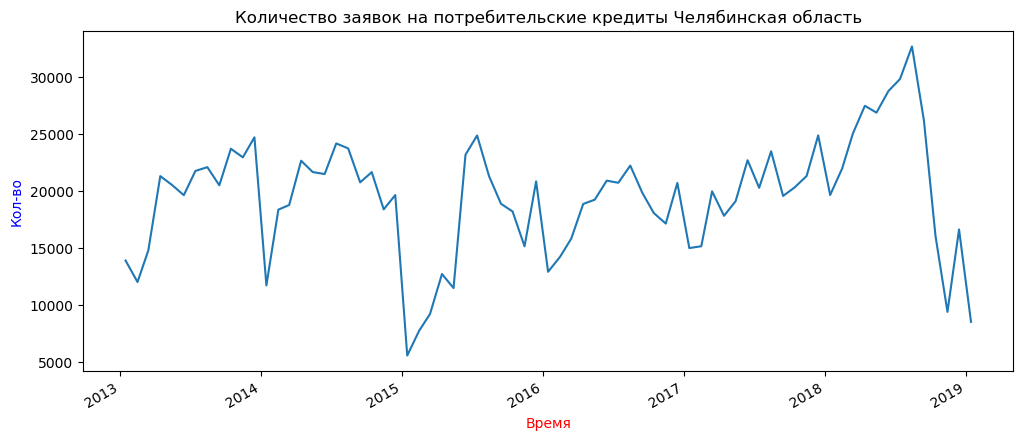

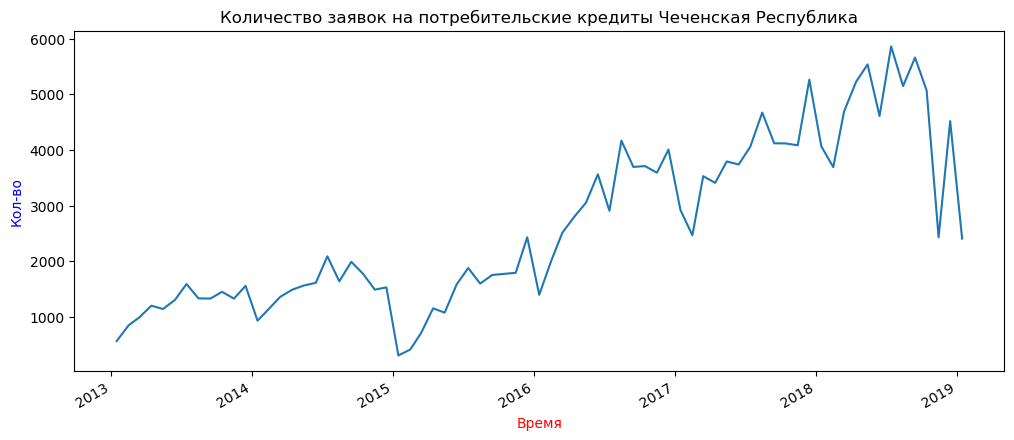

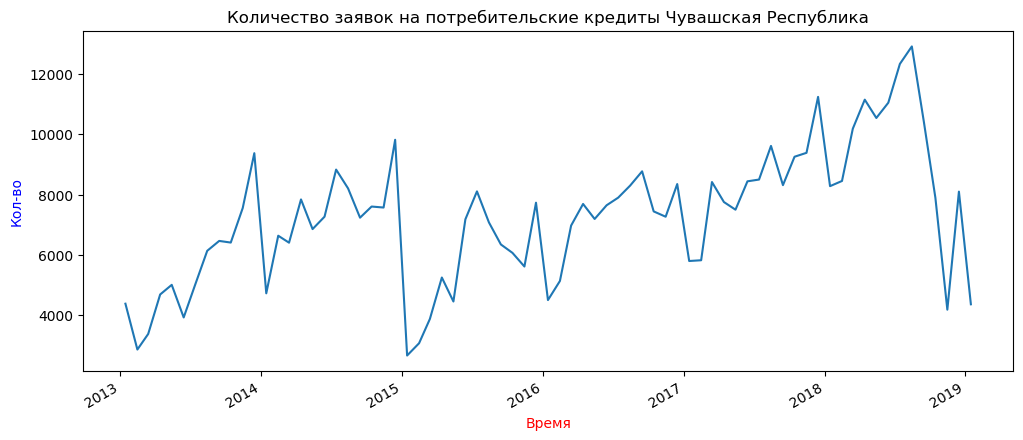

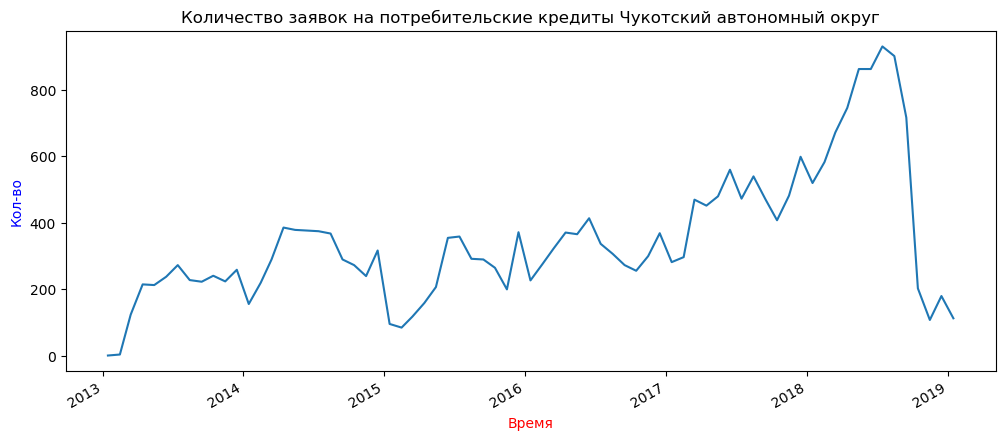

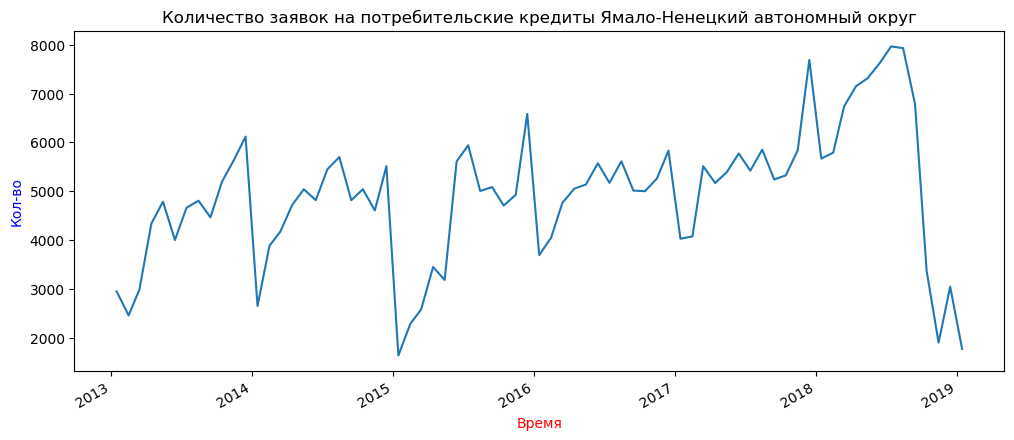

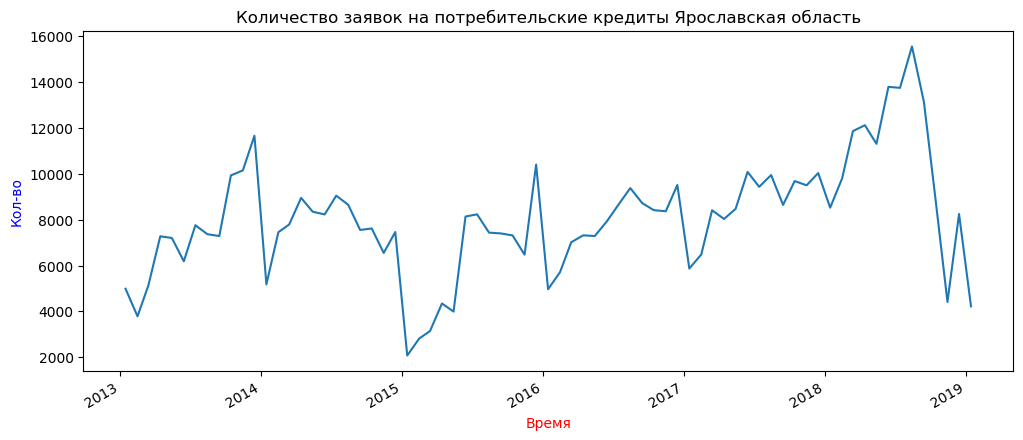

In [25]:
res_df_cr=res_df[res_df['name']=='Количество заявок на потребительские кредиты']


for reg in res_df_cr['region'].unique():
    fig, axes = plt.subplots(figsize=(12,5), dpi=100)
#     myFmt = mdates.DateFormatter('%d')
#     axes.yaxis.set_major_formatter(myFmt)
    axes.plot( pd.to_datetime(res_df_cr[res_df_cr['region'] == reg]['date']), res_df_cr[res_df_cr['region']==reg]['value'])
    axes.set_ylabel("Кол-во",color="blue")
    axes.set_xlabel("Время",color="red")    
    plt.gcf().autofmt_xdate()    
    axes.set_title('Количество заявок на потребительские кредиты '+reg)
    plt.show()       

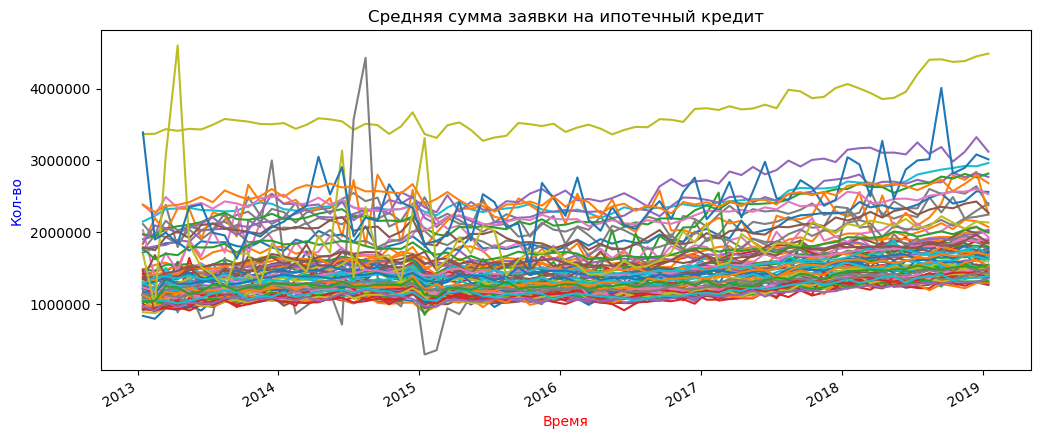

In [26]:
res_df_cr=res_df[res_df['name']=='Средняя сумма заявки на ипотечный кредит']

fig, axes = plt.subplots(figsize=(12,5), dpi=100)
axes.set_ylabel("Кол-во",color="blue")
axes.set_xlabel("Время",color="red")    
plt.gcf().autofmt_xdate()    
axes.set_title('Средняя сумма заявки на ипотечный кредит')

for reg in res_df_cr['region'].unique():
    if reg!="Россия":
        axes.plot( pd.to_datetime(res_df_cr[res_df_cr['region'] == reg]['date']), res_df_cr[res_df_cr['region']==reg]['value'])
    
plt.show()   